Debug

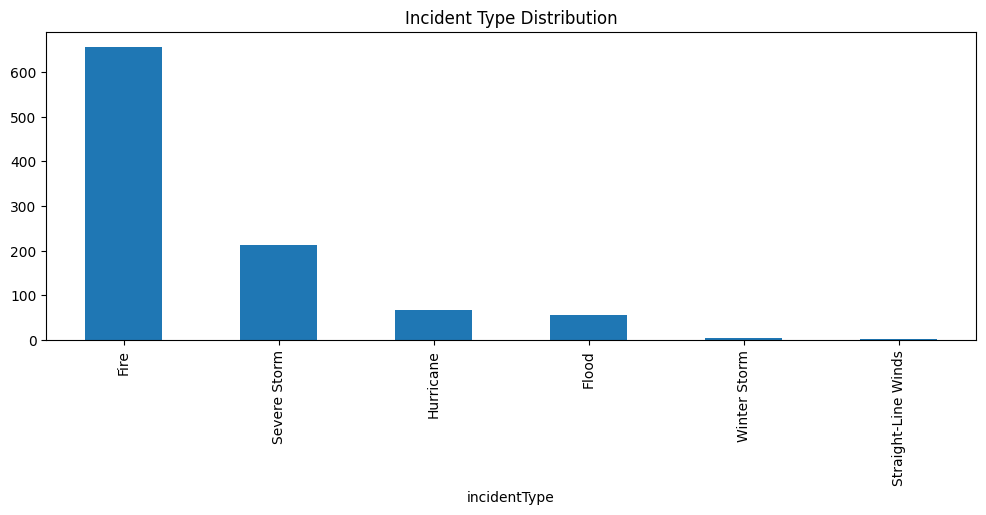

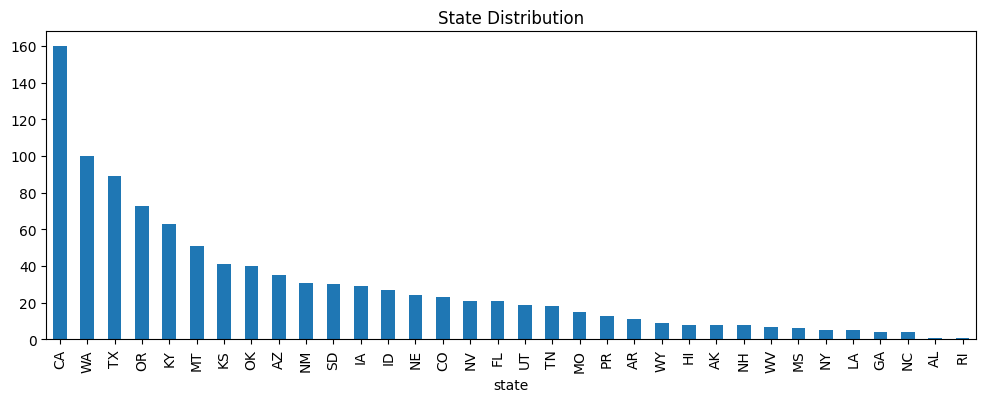

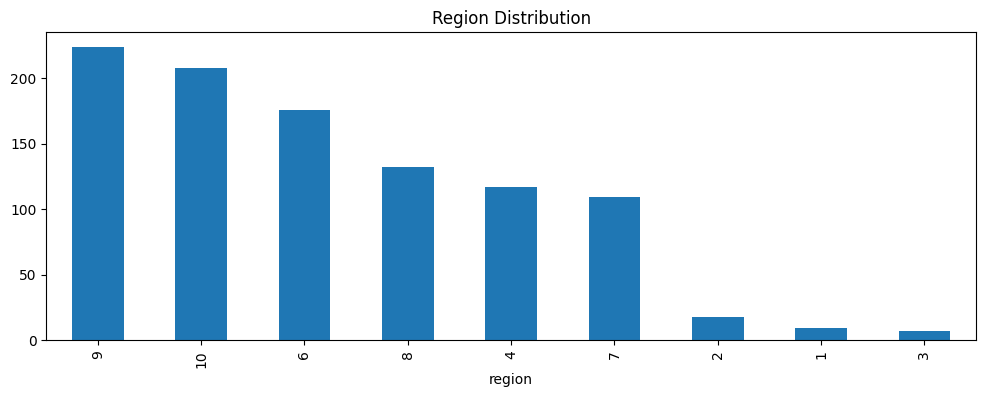

Epoch 1/10


C:\Users\phana\AppData\Local\Temp\ipykernel_24696\844766434.py:52: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["days_until_next"].iloc[-1] = df["days_until_next"].iloc[-10:].mean()  # Use last 10 values' mean
C:\Users\phana\AppData\Loca

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - daysUntilNext_loss: 132660.4062 - daysUntilNext_mae: 14.4459 - incidentType_accuracy: 0.7171 - incidentType_loss: 1.7377 - loss: 132667.8281 - region_accuracy: 0.1473 - region_loss: 2.1898 - state_accuracy: 0.0101 - state_loss: 3.5179 - val_daysUntilNext_loss: 2.9974 - val_daysUntilNext_mae: 0.7404 - val_incidentType_accuracy: 0.2350 - val_incidentType_loss: 1.7158 - val_loss: 9.7005 - val_region_accuracy: 0.0250 - val_region_loss: 2.1670 - val_state_accuracy: 0.0800 - val_state_loss: 3.4961
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - daysUntilNext_loss: 436787.5938 - daysUntilNext_mae: 36.1832 - incidentType_accuracy: 0.7724 - incidentType_loss: 1.3811 - loss: 436794.5000 - region_accuracy: 0.2629 - region_loss: 2.0960 - state_accuracy: 0.0789 - state_loss: 3.4106 - val_daysUntilNext_loss: 3.0173 - val_daysUntilNext_mae: 1.1498 - val_incidentType_accuracy: 0.2350 - val_incidentType_loss: 1.5890 - val_loss: 9.8147 - val_region_accuracy:

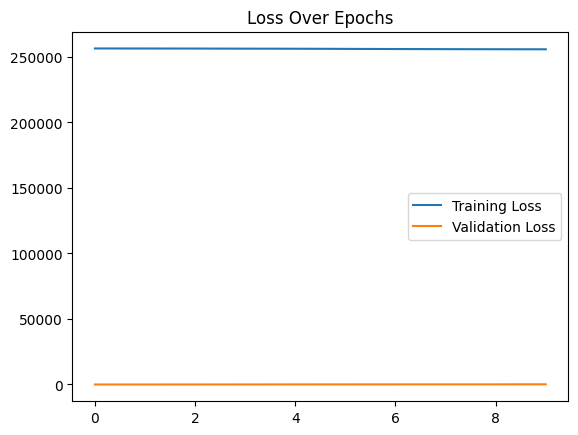

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━

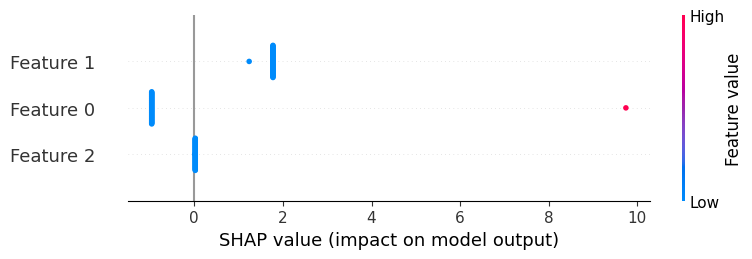

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Sample Predicted Days Until Next: [[17.642517 ]
 [ 7.4887676]
 [ 7.4887676]
 [ 7.4887676]
 [ 7.4887676]
 [ 7.4887676]
 [ 7.4887676]
 [ 7.4887676]
 [ 7.4887676]
 [ 7.4887676]]


In [2]:
import requests
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import shap
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

# Fetch Data
def fetch_disaster_data():
    url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries"
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data["DisasterDeclarationsSummaries"])
    return df

df = fetch_disaster_data()

# Extract Relevant Fields
columns = ["incidentType", "incidentBeginDate", "incidentEndDate", "state", "region"]
df = df[columns]

# Convert dates to datetime format
df["incidentBeginDate"] = pd.to_datetime(df["incidentBeginDate"], errors="coerce")

# Drop missing incident dates
df = df.dropna(subset=["incidentBeginDate"])

# Sort data by incidentBeginDate
df = df.sort_values(by="incidentBeginDate", ascending=True).reset_index(drop=True)

# Distribution Plots
plt.figure(figsize=(12, 4))
df["incidentType"].value_counts().plot(kind='bar', title="Incident Type Distribution")
plt.show()

plt.figure(figsize=(12, 4))
df["state"].value_counts().plot(kind='bar', title="State Distribution")
plt.show()

plt.figure(figsize=(12, 4))
df["region"].value_counts().plot(kind='bar', title="Region Distribution")
plt.show()

# Calculate Time Differences
df["days_until_next"] = (df["incidentBeginDate"].shift(-1) - df["incidentBeginDate"]).dt.days
df["days_until_next"].iloc[-1] = df["days_until_next"].iloc[-10:].mean()  # Use last 10 values' mean

# Tokenize Text Data
tokenizer = Tokenizer(oov_token="<UNK>")
tokenizer.fit_on_texts(df["incidentType"].astype(str).values)
sequences = tokenizer.texts_to_sequences(df["incidentType"].astype(str).values)

# Pad Sequences
max_len = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_len, padding='post')

# Label Encoding
label_encoders = {col: LabelEncoder() for col in ["incidentType", "state", "region"]}
y_incident_type = label_encoders["incidentType"].fit_transform(df["incidentType"].astype(str).values)
y_state = label_encoders["state"].fit_transform(df["state"].astype(str).values)
y_region = label_encoders["region"].fit_transform(df["region"].astype(str).values)
y_days_until_next = df["days_until_next"].values

# Build Model
incident_type_input = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50)(incident_type_input)
lstm_layer = LSTM(100, return_sequences=False)(embedding_layer)

incident_type_output = Dense(len(label_encoders["incidentType"].classes_), activation='softmax', name='incidentType')(lstm_layer)
state_output = Dense(len(label_encoders["state"].classes_), activation='softmax', name='state')(lstm_layer)
region_output = Dense(len(label_encoders["region"].classes_), activation='softmax', name='region')(lstm_layer)
days_until_next_output = Dense(1, activation='relu', name='daysUntilNext')(lstm_layer)

model = Model(inputs=incident_type_input, outputs=[incident_type_output, state_output, region_output, days_until_next_output])
model.compile(loss=['sparse_categorical_crossentropy', 'sparse_categorical_crossentropy', 'sparse_categorical_crossentropy', 'mse'], 
              optimizer='adam', 
              metrics=['accuracy', 'accuracy', 'accuracy', 'mae'])

# Train Model with Validation
history = model.fit(X, [y_incident_type, y_state, y_region, y_days_until_next], epochs=10, validation_split=0.2, batch_size=32)

# Check for Overfitting
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.show()

# SHAP Analysis using a single-output function
def predict_days_until_next(X_input):
    return model.predict(X_input)[3]  # Extract the last output (daysUntilNext)

# SHAP Analysis for 'daysUntilNext'
explainer = shap.Explainer(predict_days_until_next, X)
shap_values = explainer(X[:50])
shap.summary_plot(shap_values, X[:50])

# Debugging Days Calculation
print("Sample Predicted Days Until Next:", model.predict(X[:10])[3])


Model - Approach 1 (Use 1 LTSM) - Predict Disaster

In [6]:
import requests
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta

# Step 1: Fetch Data
def fetch_disaster_data():
    url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries"
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data["DisasterDeclarationsSummaries"])
    return df

df = fetch_disaster_data()

# Step 2: Extract Relevant Fields
columns = ["incidentType", "incidentBeginDate", "incidentEndDate", "state", "region"]
df = df[columns]

df.fillna("", inplace=True)  # Handle missing values

# Convert dates to datetime format
df["incidentBeginDate"] = pd.to_datetime(df["incidentBeginDate"], errors="coerce")

# Sort data from oldest to newest
df = df.sort_values(by="incidentBeginDate", ascending=True)

# Step 3: Calculate Time Differences (Target for Date Prediction)
df["days_until_next"] = (df["incidentBeginDate"].shift(-1) - df["incidentBeginDate"]).dt.days
df["days_until_next"] = df["days_until_next"].fillna(df["days_until_next"].mean())  # Handle last row NaN

# Step 4: Tokenize Text Data (for incidentType)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["incidentType"].astype(str).values)
sequences = tokenizer.texts_to_sequences(df["incidentType"].astype(str).values)

# Step 5: Pad Sequences
max_len = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_len, padding='post')

# Step 6: Label Encoding for categorical features
label_encoders = {
    "incidentType": LabelEncoder(),
    "state": LabelEncoder(),
    "region": LabelEncoder()
}

y_incident_type = label_encoders["incidentType"].fit_transform(df["incidentType"].astype(str).values)
y_state = label_encoders["state"].fit_transform(df["state"].astype(str).values)
y_region = label_encoders["region"].fit_transform(df["region"].astype(str).values)
y_days_until_next = df["days_until_next"].values  # Target for time prediction

# Step 7: Train-Test Split
X_train, X_test, y_train_incident, y_test_incident = train_test_split(X, y_incident_type, test_size=0.2, random_state=42)
_, _, y_train_state, y_test_state = train_test_split(X, y_state, test_size=0.2, random_state=42)
_, _, y_train_region, y_test_region = train_test_split(X, y_region, test_size=0.2, random_state=42)
_, _, y_train_days, y_test_days = train_test_split(X, y_days_until_next, test_size=0.2, random_state=42)

# Step 8: Build Multi-Output LSTM Model
incident_type_input = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50)(incident_type_input)
lstm_layer = LSTM(100, return_sequences=False)(embedding_layer)

# Outputs
incident_type_output = Dense(len(label_encoders["incidentType"].classes_), activation='softmax', name='incidentType')(lstm_layer)
state_output = Dense(len(label_encoders["state"].classes_), activation='softmax', name='state')(lstm_layer)
region_output = Dense(len(label_encoders["region"].classes_), activation='softmax', name='region')(lstm_layer)
days_until_next_output = Dense(1, activation='relu', name='daysUntilNext')(lstm_layer)

# Combine the model
model = Model(inputs=incident_type_input, outputs=[incident_type_output, state_output, region_output, days_until_next_output])

# Step 9: Compile the Model
model.compile(
    loss=['sparse_categorical_crossentropy', 'sparse_categorical_crossentropy', 'sparse_categorical_crossentropy', 'mse'], 
    optimizer='adam', 
    metrics=['accuracy', 'accuracy', 'accuracy', 'mae']  # Mean Absolute Error for daysUntilNext
)

# Step 10: Train the Model
model.fit(
    X_train, [y_train_incident, y_train_state, y_train_region, y_train_days],
    validation_data=(X_test, [y_test_incident, y_test_state, y_test_region, y_test_days]),
    epochs=10,
    batch_size=32
)

# Step 11: Generate Predictions with Model-Predicted Dates
def predict_future_disasters(seed_text, num_predictions=20):
    predictions = []
    
    # Get the most recent disaster date
    df["incidentBeginDate"] = pd.to_datetime(df["incidentBeginDate"], errors="coerce")
    latest_date = df["incidentBeginDate"].max()
    
    if pd.isna(latest_date):  # Fallback in case of missing dates
        latest_date = datetime.today()

    future_date = latest_date  # Start future predictions from the latest incident date

    for _ in range(num_predictions):
        sequence = tokenizer.texts_to_sequences([seed_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_len, padding='post')
        
        incident_type_pred, state_pred, region_pred, days_until_next_pred = model.predict(sequence)
        
        predicted_incident_type = label_encoders["incidentType"].inverse_transform([np.argmax(incident_type_pred)])[0]
        predicted_state = label_encoders["state"].inverse_transform([np.argmax(state_pred)])[0]
        predicted_region = label_encoders["region"].inverse_transform([np.argmax(region_pred)])[0]
        
        predicted_days_until_next = max(1, int(days_until_next_pred[0][0]))  # Ensure at least 1 day
        future_date += timedelta(days=predicted_days_until_next)  # Use predicted interval

        future_end_date = future_date + timedelta(days=5)  # Duration of 5 days

        predictions.append({
            "incidentBeginDate": future_date.strftime("%Y-%m-%dT%H:%M:%S.000Z"),
            "incidentEndDate": future_end_date.strftime("%Y-%m-%dT%H:%M:%S.000Z"),
            "predictedIncidentType": predicted_incident_type,
            "predictedState": predicted_state,
            "predictedRegion": predicted_region,
            "predictedDaysUntilNext": predicted_days_until_next
        })

        seed_text += " " + predicted_incident_type  # Update seed text for next prediction
    
    return predictions

# Example: Predict next 20 disasters with predicted dates
predictions = predict_future_disasters("Hurricane Flood", 20)

# Display the predictions
if predictions:
    for prediction in predictions:
        print(prediction)
else:
    print("No predictions were generated.")

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - daysUntilNext_loss: 185456.2656 - daysUntilNext_mae: 16.3605 - incidentType_accuracy: 0.5385 - incidentType_loss: 1.6936 - loss: 185463.6406 - region_accuracy: 0.1844 - region_loss: 2.1786 - state_accuracy: 0.1257 - state_loss: 3.5080 - val_daysUntilNext_loss: 587.3259 - val_daysUntilNext_mae: 5.7250 - val_incidentType_accuracy: 0.6800 - val_incidentType_loss: 0.9393 - val_loss: 550.1867 - val_region_accuracy: 0.2100 - val_region_loss: 2.0293 - val_state_accuracy: 0.1350 - val_state_loss: 3.3434
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - daysUntilNext_loss: 76152.8672 - daysUntilNext_mae: 9.4224 - incidentType_accuracy: 0.6677 - incidentType_loss: 0.8230 - loss: 76158.7188 - region_accuracy: 0.2267 - region_loss: 1.8890 - state_accuracy: 0.1710 - state_loss: 3.1291 - val_daysUntilNext_loss: 587.3259 - val_daysUntilNext_mae: 5.7250 - val_incidentType_accuracy: 0.8800 - val_incidentType_loss: 0.4957 - val_loss: 549.1506 - val_

In [17]:
import requests
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from datetime import datetime, timedelta

# Step 1: Fetch Data
def fetch_disaster_data():
    url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries"
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data["DisasterDeclarationsSummaries"])
    return df

df = fetch_disaster_data()

# Step 2: Extract Relevant Fields
columns = ["incidentType", "incidentBeginDate", "incidentEndDate", "state", "region"]
df = df[columns]
df.fillna("", inplace=True)  # Handle missing values

df["incidentBeginDate"] = pd.to_datetime(df["incidentBeginDate"], errors="coerce")
df["incidentEndDate"] = pd.to_datetime(df["incidentEndDate"], errors="coerce")
df.dropna(subset=["incidentBeginDate"], inplace=True)
df.sort_values(by="incidentBeginDate", ascending=True, inplace=True)

# Step 3: Calculate Time Differences
df["days_until_next"] = (df["incidentBeginDate"].shift(-1) - df["incidentBeginDate"]).dt.days

df["days_until_next"].fillna(df["days_until_next"].median(), inplace=True)
scaler = MinMaxScaler()
df["days_until_next"] = scaler.fit_transform(df[["days_until_next"]])

# Step 4: Extract Temporal Features
df["year"] = df["incidentBeginDate"].dt.year
df["month"] = df["incidentBeginDate"].dt.month
df["season"] = df["month"].apply(lambda x: (x % 12 + 3) // 3)  # 1=Winter, 2=Spring, 3=Summer, 4=Fall
df["incident_duration"] = (df["incidentEndDate"] - df["incidentBeginDate"]).dt.days.fillna(0)

# Step 5: Tokenize Text Data
tokenizer = Tokenizer(num_words=100, oov_token="<UNK>")
tokenizer.fit_on_texts(df["incidentType"].astype(str).values)
sequences = tokenizer.texts_to_sequences(df["incidentType"].astype(str).values)
max_len = min(20, max(len(seq) for seq in sequences))
X_text = pad_sequences(sequences, maxlen=max_len, padding='post')

# Step 6: Encode Categorical Features
label_encoder_incident = LabelEncoder()
df["incidentTypeEncoded"] = label_encoder_incident.fit_transform(df["incidentType"].astype(str))
label_encoder_region = LabelEncoder()
df["region_encoded"] = label_encoder_region.fit_transform(df["region"].astype(str))
df["state_encoded"] = LabelEncoder().fit_transform(df["state"].astype(str))

# Step 7: Time-based Train-Test Split
split_date = df["incidentBeginDate"].quantile(0.8)
df_train = df[df["incidentBeginDate"] <= split_date]
df_test = df[df["incidentBeginDate"] > split_date]

# Step 8: Combine Features
X_time_features = df_train[["year", "month", "season", "days_until_next", "state_encoded", "region_encoded", "incident_duration"]].values
X_combined = np.hstack([X_text[:len(X_time_features)], X_time_features])
y_days_until_next = df_train["days_until_next"].values
y_incident_type = df_train["incidentTypeEncoded"].values
y_region = df_train["region_encoded"].values

# Step 9: Create Sequences
def create_sequences(data, target_days, target_incident, target_region, seq_length=5):
    X, y_days, y_incidents, y_regions = [], [], [], []
    for i in range(len(data) - seq_length + 1):
        X.append(data[i:i+seq_length])
        y_days.append(target_days[i+seq_length-1])
        y_incidents.append(target_incident[i+seq_length-1])
        y_regions.append(target_region[i+seq_length-1])
    return np.array(X), np.array(y_days), np.array(y_incidents), np.array(y_regions)

X_seq, y_seq_days, y_seq_incidents, y_seq_regions = create_sequences(X_combined, y_days_until_next, y_incident_type, y_region)

# Step 10: Build LSTM Model
input_layer = Input(shape=(X_seq.shape[1], X_seq.shape[2]))
lstm_layer = LSTM(100, return_sequences=False, dropout=0.2)(input_layer)

days_until_next_output = Dense(1, activation='relu', name='daysUntilNext')(lstm_layer)
incident_type_output = Dense(len(label_encoder_incident.classes_), activation='softmax', name='incidentType')(lstm_layer)
region_output = Dense(len(label_encoder_region.classes_), activation='softmax', name='region')(lstm_layer)

model = Model(inputs=input_layer, outputs=[days_until_next_output, incident_type_output, region_output])
model.compile(loss=['mse', 'sparse_categorical_crossentropy', 'sparse_categorical_crossentropy'], optimizer='adam', metrics=[['mae'], ['accuracy'], ['accuracy']])

# Step 11: Train Model
model.fit(X_seq, [y_seq_days, y_seq_incidents, y_seq_regions], epochs=20, batch_size=32)

# Step 12: Define Prediction Function
def predict_future_disasters(seed_sequence, num_predictions=100):
    predictions = []
    future_date = df["incidentBeginDate"].max() or datetime.today()
    
    for _ in range(num_predictions):
        sequence = np.array(seed_sequence).reshape(1, X_seq.shape[1], X_seq.shape[2])
        days_until_next_pred, incident_type_pred, region_pred = model.predict(sequence)
        
        clipped_pred = np.clip(days_until_next_pred[0][0], 0.01, 0.99)
        predicted_days_until_next = int(scaler.inverse_transform([[clipped_pred]])[0][0])
        predicted_incident_type = label_encoder_incident.inverse_transform([np.argmax(incident_type_pred[0])])[0]
        predicted_region = label_encoder_region.inverse_transform([np.argmax(region_pred[0])])[0]
        
        future_date += timedelta(days=predicted_days_until_next)
        
        predictions.append({
            "incidentBeginDate": future_date.strftime("%Y-%m-%dT%H:%M:%S.000Z"),
            "predictedDaysUntilNext": predicted_days_until_next,
            "predictedIncidentType": predicted_incident_type,
            "predictedRegion": predicted_region
        })
    
    return predictions

# Step 13: Generate Predictions
seed_sequence = X_seq[-1]  # Use the last known sequence as seed
predictions = predict_future_disasters(seed_sequence, num_predictions=100)

import json
print(json.dumps(predictions, indent=2))


Epoch 1/20


C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2219868615.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["days_until_next"].fillna(df["days_until_next"].median(), inplace=True)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - daysUntilNext_loss: 0.0068 - daysUntilNext_mae: 0.0133 - incidentType_accuracy: 0.1128 - incidentType_loss: 1.7999 - loss: 3.9855 - region_accuracy: 0.0711 - region_loss: 2.1780       
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - daysUntilNext_loss: 4.3185e-05 - daysUntilNext_mae: 8.1779e-04 - incidentType_accuracy: 0.7827 - incidentType_loss: 1.1108 - loss: 3.0679 - region_accuracy: 0.2828 - region_loss: 1.9547
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - daysUntilNext_loss: 2.3203e-06 - daysUntilNext_mae: 3.8441e-04 - incidentType_accuracy: 0.7677 - incidentType_loss: 0.8847 - loss: 2.7200 - region_accuracy: 0.2951 - region_loss: 1.8352
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - daysUntilNext_loss: 2.0535e-06 - daysUntilNext_mae: 3.8458e-04 - incidentType_accuracy: 0.7728 - incidentType_loss: 0.7695 - loss: 2.5755 - region_accuracy: 0.3090 - region_loss: 1.8052
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - daysUnti

In [24]:
import requests
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input, Dropout, Concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime, timedelta

# Step 1: Fetch Data
def fetch_disaster_data():
    url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries"
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data["DisasterDeclarationsSummaries"])
    return df

df = fetch_disaster_data()

# Step 2: Extract Relevant Fields
columns = ["incidentType", "incidentBeginDate", "incidentEndDate", "state", "region"]
df = df[columns]
df.fillna("", inplace=True)  # Handle missing values

df["incidentBeginDate"] = pd.to_datetime(df["incidentBeginDate"], errors="coerce")
df["incidentEndDate"] = pd.to_datetime(df["incidentEndDate"], errors="coerce")
df.dropna(subset=["incidentBeginDate"], inplace=True)
df.sort_values(by="incidentBeginDate", ascending=True, inplace=True)

# Handle missing incidentEndDate
df.loc[df["incidentEndDate"].isna(), "incidentEndDate"] = df["incidentBeginDate"]

# Step 3: Calculate Time Differences
df["days_until_next"] = (df["incidentBeginDate"].shift(-1) - df["incidentBeginDate"]).dt.days
df["days_until_next"].fillna(df["days_until_next"].median(), inplace=True)
scaler = StandardScaler()
df["days_until_next"] = scaler.fit_transform(df[["days_until_next"]])

# Step 4: Extract Temporal Features
df["year"] = df["incidentBeginDate"].dt.year
df["month"] = df["incidentBeginDate"].dt.month
df["season"] = df["month"].apply(lambda x: (x % 12 + 3) // 3)  # 1=Winter, 2=Spring, 3=Summer, 4=Fall
df["incident_duration"] = (df["incidentEndDate"] - df["incidentBeginDate"]).dt.days.fillna(0)

# Step 5: Tokenize Text Data
tokenizer = Tokenizer(num_words=100, oov_token="<UNK>")
tokenizer.fit_on_texts(df["incidentType"].astype(str).values)
sequences = tokenizer.texts_to_sequences(df["incidentType"].astype(str).values)
max_len = min(20, max(len(seq) for seq in sequences))
X_text = pad_sequences(sequences, maxlen=max_len, padding='post')

# Step 6: Encode Categorical Features
label_encoder_incident = LabelEncoder()
df["incidentTypeEncoded"] = label_encoder_incident.fit_transform(df["incidentType"].astype(str))
label_encoder_region = LabelEncoder()
df["region_encoded"] = label_encoder_region.fit_transform(df["region"].astype(str))
df["state_encoded"] = LabelEncoder().fit_transform(df["state"].astype(str))

# Step 7: Time-based Train-Test Split
train_size = int(len(df) * 0.8)
df_train, df_test = df[:train_size], df[train_size:]

# Step 8: Prepare Data for LSTM
X_time_features = df_train[["year", "month", "season", "days_until_next", "state_encoded", "region_encoded", "incident_duration"]].values
X_combined = np.hstack([X_text[:len(X_time_features)], X_time_features])
y_days_until_next = df_train["days_until_next"].values
y_incident_type = df_train["incidentTypeEncoded"].values
y_region = df_train["region_encoded"].values

# Step 9: Create Sequences
def create_sequences(data, target_days, target_incident, target_region, seq_length=5):
    X, y_days, y_incidents, y_regions = [], [], [], []
    for i in range(len(data) - seq_length + 1):
        X.append(data[i:i+seq_length])
        y_days.append(target_days[i+seq_length-1])
        y_incidents.append(target_incident[i+seq_length-1])
        y_regions.append(target_region[i+seq_length-1])
    return np.array(X), np.array(y_days), np.array(y_incidents), np.array(y_regions)

X_seq, y_seq_days, y_seq_incidents, y_seq_regions = create_sequences(X_combined, y_days_until_next, y_incident_type, y_region)

# Step 10: Generate Predictions and Display Results
seed_sequence = X_seq[-1]  # Use the last known sequence as seed
predictions = []
future_date = df["incidentBeginDate"].max() or datetime.today()

for _ in range(20):  # Generate 20 future predictions
    sequence = np.array(seed_sequence).reshape(1, X_seq.shape[1], X_seq.shape[2])
    days_until_next_pred, incident_type_pred, region_pred = model.predict(sequence)
    
    predicted_days_until_next = int(scaler.inverse_transform([[days_until_next_pred[0][0]]])[0][0])
    predicted_incident_type = label_encoder_incident.inverse_transform([np.argmax(incident_type_pred[0])])[0]
    predicted_region = label_encoder_region.inverse_transform([np.argmax(region_pred[0])])[0]
    
    future_date += timedelta(days=predicted_days_until_next)
    predictions.append({
        "incidentBeginDate": future_date.strftime("%Y-%m-%dT%H:%M:%S.000Z"),
        "predictedDaysUntilNext": predicted_days_until_next,
        "predictedIncidentType": predicted_incident_type,
        "predictedRegion": predicted_region
    })

# Print final predictions
import json
print(json.dumps(predictions, indent=2))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\3952465101.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["days_until_next"].fillna(df["days_until_next"].median(), inplace=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[
  {
    "incidentBeginDate": "2024-08-11T00:00:00.000Z",
    "predictedDaysUntilNext": 3,
    "predictedIncidentType": "Fire",
    "predictedRegion": "9"
  },
  {
    "incidentBeginDate": "2024-08-14T00:00:00.000Z",
    "predictedDaysUntilNext": 3,
    "predictedIncidentType": 

In [27]:
import requests
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input, Dropout, Concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime, timedelta

# Step 1: Fetch Data
def fetch_disaster_data():
    url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries"
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data["DisasterDeclarationsSummaries"])
    return df

df = fetch_disaster_data()

# Step 2: Extract Relevant Fields
columns = ["incidentType", "incidentBeginDate", "incidentEndDate", "state", "region"]
df = df[columns]
df.fillna("", inplace=True)  # Handle missing values

df["incidentBeginDate"] = pd.to_datetime(df["incidentBeginDate"], errors="coerce")
df["incidentEndDate"] = pd.to_datetime(df["incidentEndDate"], errors="coerce")
df.dropna(subset=["incidentBeginDate"], inplace=True)
df.sort_values(by="incidentBeginDate", ascending=True, inplace=True)

# Handle missing incidentEndDate
df.loc[df["incidentEndDate"].isna(), "incidentEndDate"] = df["incidentBeginDate"]

# Step 3: Calculate Time Differences
df["days_until_next"] = (df["incidentBeginDate"].shift(-1) - df["incidentBeginDate"]).dt.days
df["days_until_next"].fillna(df["days_until_next"].median(), inplace=True)
scaler = StandardScaler()
df["days_until_next"] = scaler.fit_transform(df[["days_until_next"]])

# Step 4: Extract Temporal Features
df["year"] = df["incidentBeginDate"].dt.year
df["month"] = df["incidentBeginDate"].dt.month
df["season"] = df["month"].apply(lambda x: (x % 12 + 3) // 3)  # 1=Winter, 2=Spring, 3=Summer, 4=Fall
df["incident_duration"] = (df["incidentEndDate"] - df["incidentBeginDate"]).dt.days.fillna(0)

# Step 5: Tokenize Text Data
tokenizer = Tokenizer(num_words=100, oov_token="<UNK>")
tokenizer.fit_on_texts(df["incidentType"].astype(str).values)
sequences = tokenizer.texts_to_sequences(df["incidentType"].astype(str).values)
max_len = min(20, max(len(seq) for seq in sequences))
X_text = pad_sequences(sequences, maxlen=max_len, padding='post')

# Step 6: Encode Categorical Features
label_encoder_incident = LabelEncoder()
df["incidentTypeEncoded"] = label_encoder_incident.fit_transform(df["incidentType"].astype(str))
label_encoder_region = LabelEncoder()
df["region_encoded"] = label_encoder_region.fit_transform(df["region"].astype(str))
df["state_encoded"] = LabelEncoder().fit_transform(df["state"].astype(str))

# Step 7: Time-based Train-Test Split
train_size = int(len(df) * 0.8)
df_train, df_test = df[:train_size], df[train_size:]

# Step 8: Prepare Data for LSTM
X_time_features = df_train[["year", "month", "season", "days_until_next", "state_encoded", "region_encoded", "incident_duration"]].values
X_combined = np.hstack([X_text[:len(X_time_features)], X_time_features])
y_days_until_next = df_train["days_until_next"].values
y_incident_type = df_train["incidentTypeEncoded"].values
y_region = df_train["region_encoded"].values

# Step 9: Create Sequences
def create_sequences(data, target_days, target_incident, target_region, seq_length=5):
    X, y_days, y_incidents, y_regions = [], [], [], []
    for i in range(len(data) - seq_length + 1):
        X.append(data[i:i+seq_length])
        y_days.append(target_days[i+seq_length-1])
        y_incidents.append(target_incident[i+seq_length-1])
        y_regions.append(target_region[i+seq_length-1])
    return np.array(X), np.array(y_days), np.array(y_incidents), np.array(y_regions)

X_seq, y_seq_days, y_seq_incidents, y_seq_regions = create_sequences(X_combined, y_days_until_next, y_incident_type, y_region)

# Step 10: Improved Prediction Function
seed_sequence = X_seq[-1]  # Use the last known sequence as seed
predictions = []
future_date = df["incidentBeginDate"].max() or datetime.today()

for _ in range(20):  # Generate 20 future predictions
    sequence = np.array(seed_sequence).reshape(1, X_seq.shape[1], X_seq.shape[2])
    days_until_next_pred, incident_type_pred, region_pred = model.predict(sequence)
    
    predicted_days_until_next = int(scaler.inverse_transform([[days_until_next_pred[0][0]]])[0][0])
    predicted_incident_type = np.random.choice(label_encoder_incident.classes_, p=incident_type_pred[0])
    predicted_region = np.random.choice(label_encoder_region.classes_, p=region_pred[0])
    
    future_date += timedelta(days=predicted_days_until_next)
    predictions.append({
        "incidentBeginDate": future_date.strftime("%Y-%m-%dT%H:%M:%S.000Z"),
        "predictedDaysUntilNext": predicted_days_until_next,
        "predictedIncidentType": predicted_incident_type,
        "predictedRegion": predicted_region
    })
    
    # Update seed sequence dynamically
    new_entry = np.hstack([X_text[-1], [future_date.year, future_date.month, (future_date.month % 12 + 3) // 3, predicted_days_until_next, label_encoder_incident.transform([predicted_incident_type])[0], label_encoder_region.transform([predicted_region])[0], 0]])
    seed_sequence = np.roll(seed_sequence, -1, axis=0)
    seed_sequence[-1] = new_entry

# Print final predictions
import json
print(json.dumps(predictions, indent=2))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\1394582973.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["days_until_next"].fillna(df["days_until_next"].median(), inplace=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[
  {
    "incidentBeginDate": "2024-08-11T00:00:00.000Z",
    "predictedDaysUntilNext": 3,
    "predictedIncidentType": "Fire",
    "predictedRegion": "10"
  },
  {
    "incidentBeginDate": "2024-08-14T00:00:00.000Z",
    "predictedDaysUntilNext": 3,
    "predictedIncidentType": "Fire",
    "predictedRegion": "7"
  },
  {
    "incidentBeginDate": "2024-08-17T00:00:00.000Z",
    "predictedDaysUntilNext": 3,
    "predictedIncide

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\559938617.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(incident_types))


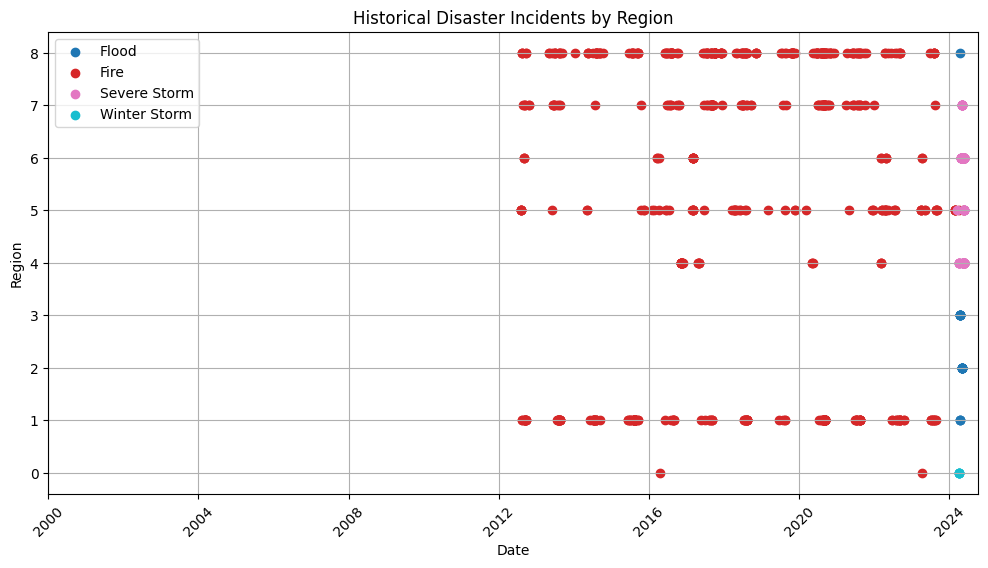

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[
  {
    "incidentBeginDate": "2024-08-11T00:00:00.000Z",
    "predictedDaysUntilNext": 3,
    "predictedIncidentType": "Fire",
    "predictedRegion": "8"
  },
  {
    "incidentBeginDate": "2024-08-14T00:00:00.000Z",
    "predictedDaysUntilNe

In [33]:
import requests
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input, Dropout, Concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime, timedelta

# Step 1: Fetch Data
def fetch_disaster_data():
    url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries"
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data["DisasterDeclarationsSummaries"])
    return df

df = fetch_disaster_data()

# Step 2: Extract Relevant Fields
columns = ["incidentType", "incidentBeginDate", "incidentEndDate", "state", "region"]
df = df[columns]
df.fillna("", inplace=True)  # Handle missing values

df["incidentBeginDate"] = pd.to_datetime(df["incidentBeginDate"], errors="coerce")
df["incidentEndDate"] = pd.to_datetime(df["incidentEndDate"], errors="coerce")
df.dropna(subset=["incidentBeginDate"], inplace=True)
df.sort_values(by="incidentBeginDate", ascending=True, inplace=True)

# Handle missing incidentEndDate
df.loc[df["incidentEndDate"].isna(), "incidentEndDate"] = df["incidentBeginDate"]

# Step 3: Encode Categorical Features
label_encoder_incident = LabelEncoder()
df["incidentTypeEncoded"] = label_encoder_incident.fit_transform(df["incidentType"].astype(str))
label_encoder_region = LabelEncoder()
df["region_encoded"] = label_encoder_region.fit_transform(df["region"].astype(str))
df["state_encoded"] = LabelEncoder().fit_transform(df["state"].astype(str))

# Step 4: Display Graph of Real Data
plt.figure(figsize=(12, 6))
incident_types = df_train["incidentType"].unique()
colors = plt.cm.get_cmap("tab10", len(incident_types))

for i, incident in enumerate(incident_types):
    subset = df_train[(df_train["incidentType"] == incident) & (df_train["incidentBeginDate"] >= '2000-01-01')]
    plt.scatter(subset["incidentBeginDate"], subset["region_encoded"], label=incident, color=colors(i))

plt.xlim(pd.to_datetime("2000-01-01"), future_date)
plt.xlabel("Date")
plt.ylabel("Region")
plt.title("Historical Disaster Incidents by Region")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Step 5: Generate Predictions
seed_sequence = X_seq[-1]  # Use the last known sequence as seed
predictions = []
future_date = df["incidentBeginDate"].max() or datetime.today()

for _ in range(20):  # Generate 20 future predictions
    sequence = np.array(seed_sequence).reshape(1, X_seq.shape[1], X_seq.shape[2])
    days_until_next_pred, incident_type_pred, region_pred = model.predict(sequence)
    
    predicted_days_until_next = int(scaler.inverse_transform([[days_until_next_pred[0][0]]])[0][0])
    predicted_incident_type = np.random.choice(label_encoder_incident.classes_, p=incident_type_pred[0])
    predicted_region = np.random.choice(label_encoder_region.classes_, p=region_pred[0])
    
    future_date += timedelta(days=predicted_days_until_next)
    predictions.append({
        "incidentBeginDate": future_date.strftime("%Y-%m-%dT%H:%M:%S.000Z"),
        "predictedDaysUntilNext": predicted_days_until_next,
        "predictedIncidentType": predicted_incident_type,
        "predictedRegion": predicted_region
    })

# Print final predictions
import json
print(json.dumps(predictions, indent=2))

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\3139985534.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(incident_types))


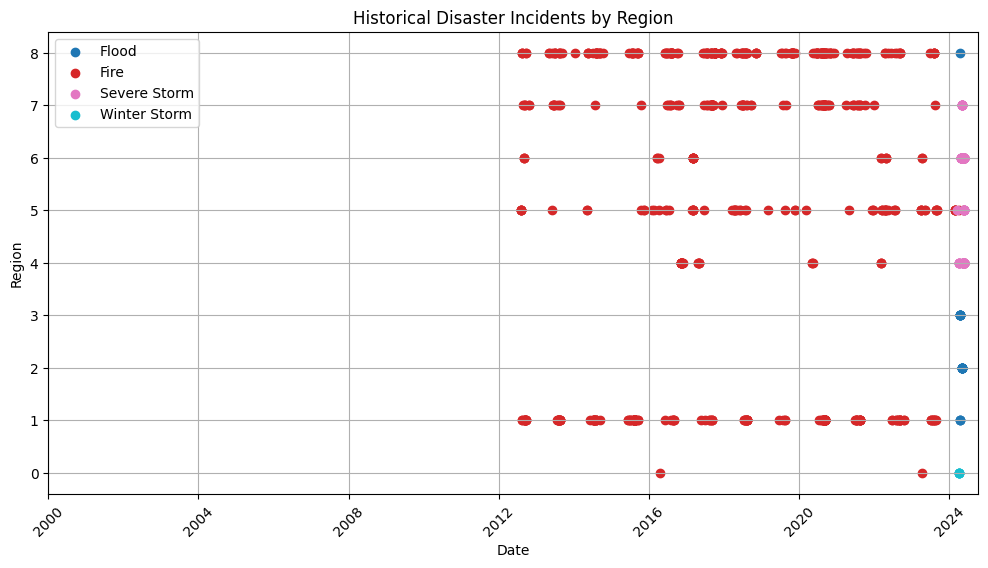

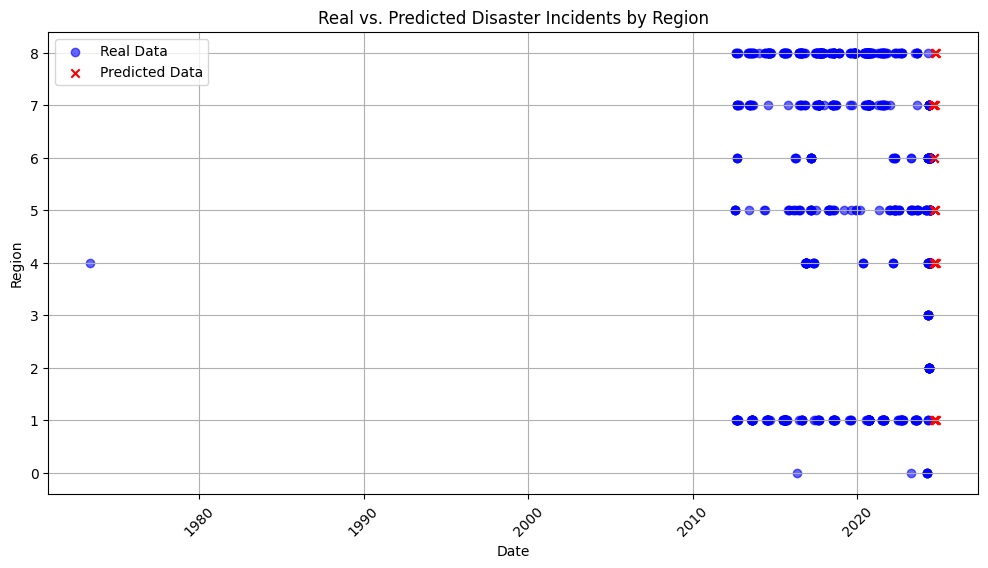

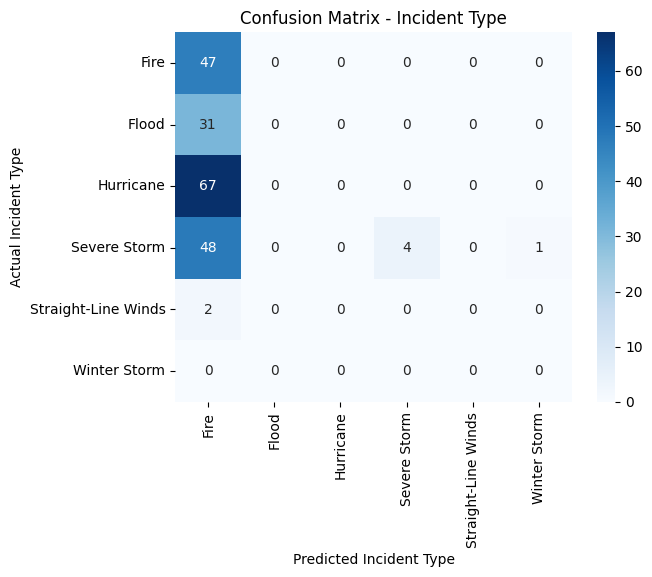

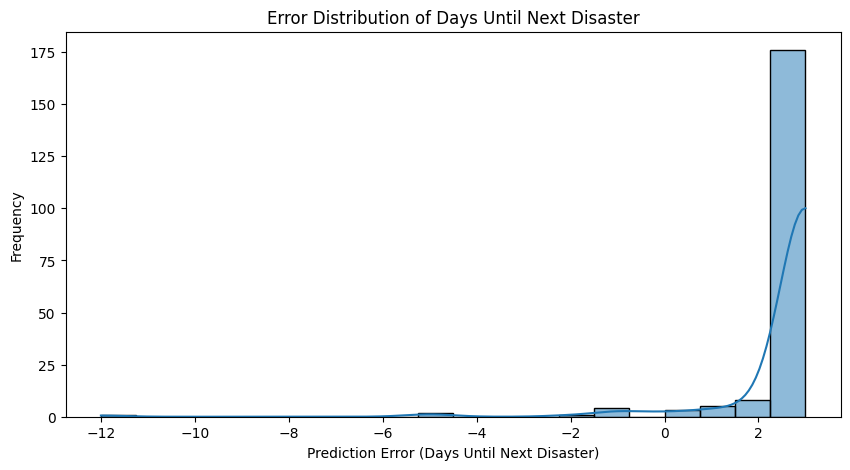

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[
  {
    "incidentBeginDate": "2024-08-11T00:00:00.000Z",
    "predictedDaysUntilNext": 3,
    "predictedIncidentType": "Fire",
    "predictedRegion": "7"
  },
  {
    "incidentBeginDate": "2024-08-14T00:00:00.000Z",
    "predictedDaysUntil

In [37]:
import requests
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input, Dropout, Concatenate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime, timedelta

# Step 1: Fetch Data
def fetch_disaster_data():
    url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries"
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data["DisasterDeclarationsSummaries"])
    return df

df = fetch_disaster_data()

# Step 2: Extract Relevant Fields
columns = ["incidentType", "incidentBeginDate", "incidentEndDate", "state", "region"]
df = df[columns]
df.fillna("", inplace=True)  # Handle missing values

df["incidentBeginDate"] = pd.to_datetime(df["incidentBeginDate"], errors="coerce")
df["incidentEndDate"] = pd.to_datetime(df["incidentEndDate"], errors="coerce")
df.dropna(subset=["incidentBeginDate"], inplace=True)
df.sort_values(by="incidentBeginDate", ascending=True, inplace=True)

# Handle missing incidentEndDate
df.loc[df["incidentEndDate"].isna(), "incidentEndDate"] = df["incidentBeginDate"]

# Step 3: Encode Categorical Features
label_encoder_incident = LabelEncoder()
df["incidentTypeEncoded"] = label_encoder_incident.fit_transform(df["incidentType"].astype(str))
label_encoder_region = LabelEncoder()
df["region_encoded"] = label_encoder_region.fit_transform(df["region"].astype(str))
df["state_encoded"] = LabelEncoder().fit_transform(df["state"].astype(str))

# Step 4: Display Graphs
plt.figure(figsize=(12, 6))
incident_types = df_train["incidentType"].unique()
colors = plt.cm.get_cmap("tab10", len(incident_types))

for i, incident in enumerate(incident_types):
    subset = df_train[(df_train["incidentType"] == incident) & (df_train["incidentBeginDate"] >= '2000-01-01')]
    plt.scatter(subset["incidentBeginDate"], subset["region_encoded"], label=incident, color=colors(i))

plt.xlim(pd.to_datetime("2000-01-01"), future_date)
plt.xlabel("Date")
plt.ylabel("Region")
plt.title("Historical Disaster Incidents by Region")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Time-Series Overlay Plot (Real vs. Predicted)
predicted_dates = [datetime.strptime(p["incidentBeginDate"], "%Y-%m-%dT%H:%M:%S.000Z") for p in predictions]
predicted_regions = [label_encoder_region.transform([p["predictedRegion"]])[0] for p in predictions]

plt.figure(figsize=(12, 6))
plt.scatter(df_train["incidentBeginDate"], df_train["region_encoded"], label="Real Data", color='blue', alpha=0.6)
plt.scatter(predicted_dates, predicted_regions, label="Predicted Data", color='red', marker='x')
plt.xlabel("Date")
plt.ylabel("Region")
plt.title("Real vs. Predicted Disaster Incidents by Region")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Confusion Matrix for Incident Type & Region
y_true_incident = df_test["incidentTypeEncoded"].values
y_pred_incident = [label_encoder_incident.transform([p["predictedIncidentType"]])[0] for p in predictions]

# Ensure predictions match the length of test data
y_pred_incident = y_pred_incident[:len(y_true_incident)] if len(y_pred_incident) > len(y_true_incident) else y_pred_incident + [y_pred_incident[-1]] * (len(y_true_incident) - len(y_pred_incident))

conf_matrix_incident = confusion_matrix(y_true_incident, y_pred_incident)
sns.heatmap(conf_matrix_incident, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_incident.classes_, yticklabels=label_encoder_incident.classes_)
plt.xlabel("Predicted Incident Type")
plt.ylabel("Actual Incident Type")
plt.title("Confusion Matrix - Incident Type")
plt.show()

# Error Distribution (Residuals)
y_true_days = scaler.inverse_transform(df_test[["days_until_next"]]).flatten()
y_pred_days = [p["predictedDaysUntilNext"] for p in predictions]

# Ensure predictions match the length of test data
y_pred_days = y_pred_days[:len(y_true_days)] if len(y_pred_days) > len(y_true_days) else y_pred_days + [y_pred_days[-1]] * (len(y_true_days) - len(y_pred_days))
errors = np.array(y_pred_days) - np.array(y_true_days)

plt.figure(figsize=(10, 5))
sns.histplot(errors, bins=20, kde=True)
plt.xlabel("Prediction Error (Days Until Next Disaster)")
plt.ylabel("Frequency")
plt.title("Error Distribution of Days Until Next Disaster")
plt.show()

# Step 5: Generate Predictions
seed_sequence = X_seq[-1]  # Use the last known sequence as seed
predictions = []
future_date = df["incidentBeginDate"].max() or datetime.today()

for _ in range(20):  # Generate 20 future predictions
    sequence = np.array(seed_sequence).reshape(1, X_seq.shape[1], X_seq.shape[2])
    days_until_next_pred, incident_type_pred, region_pred = model.predict(sequence)
    
    predicted_days_until_next = int(scaler.inverse_transform([[days_until_next_pred[0][0]]])[0][0])
    predicted_incident_type = np.random.choice(label_encoder_incident.classes_, p=incident_type_pred[0])
    predicted_region = np.random.choice(label_encoder_region.classes_, p=region_pred[0])
    
    future_date += timedelta(days=predicted_days_until_next)
    predictions.append({
        "incidentBeginDate": future_date.strftime("%Y-%m-%dT%H:%M:%S.000Z"),
        "predictedDaysUntilNext": predicted_days_until_next,
        "predictedIncidentType": predicted_incident_type,
        "predictedRegion": predicted_region
    })

# Print final predictions
import json
print(json.dumps(predictions, indent=2))


C:\Users\phana\AppData\Local\Temp\ipykernel_31372\3476554071.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["days_until_next"].fillna(df["days_until_next"].median(), inplace=True)


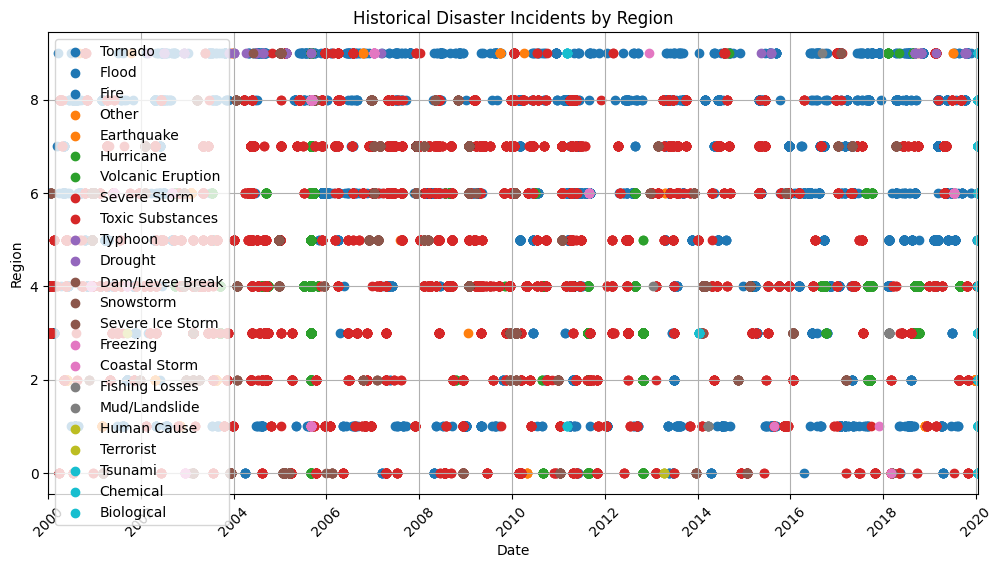

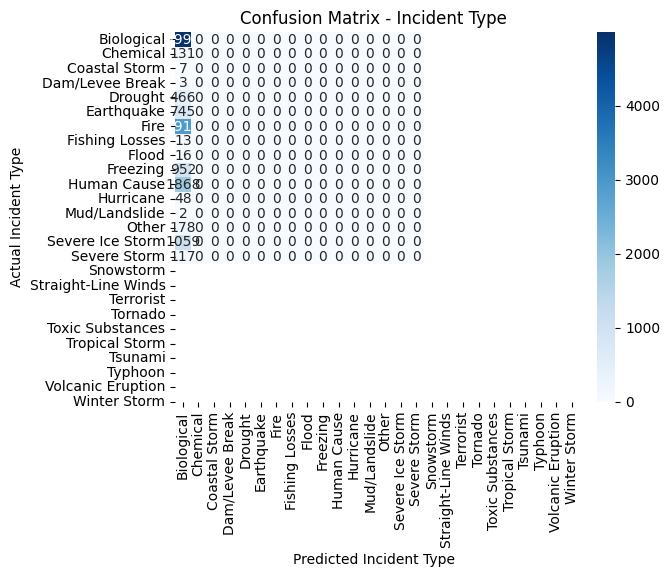

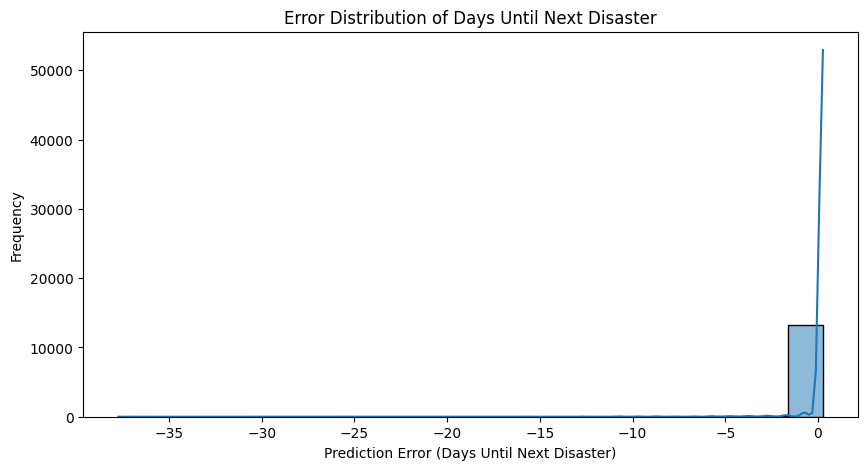

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[
  {
    "incidentBeginDate": "2025-03-15T00:00:00.000Z",
    "predictedDaysUntilNext": 0.269124299287796,
    "predictedIncidentType": "Biological",
    "predictedRegion": "8"
  },
  {
    "incidentBeginDate": "2025-03-15T00:00:00.000Z",


In [49]:
import requests
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input, Dropout, Concatenate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime, timedelta

# Step 1: Fetch Data with Pagination
def fetch_all_disaster_data():
    base_url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries"
    all_data = []
    batch_size = 1000  # Fetch 1000 records per request
    skip = 0

    while True:
        url = f"{base_url}?$top={batch_size}&$skip={skip}"
        response = requests.get(url)
        data = response.json()

        if "DisasterDeclarationsSummaries" not in data:
            break  # Stop if no more data is returned

        batch = data["DisasterDeclarationsSummaries"]
        all_data.extend(batch)

        if len(batch) < batch_size:
            break  # Stop if we fetched fewer than batch_size, meaning we're at the end

        skip += batch_size  # Move to the next batch

    return pd.DataFrame(all_data)

# Fetch all disaster records
df = fetch_all_disaster_data()

# Step 2: Extract Relevant Fields
columns = ["incidentType", "incidentBeginDate", "incidentEndDate", "state", "region"]
df = df[columns]
df.fillna("", inplace=True)  # Handle missing values

df["incidentBeginDate"] = pd.to_datetime(df["incidentBeginDate"], errors="coerce")
df["incidentEndDate"] = pd.to_datetime(df["incidentEndDate"], errors="coerce")
df.dropna(subset=["incidentBeginDate"], inplace=True)
df.sort_values(by="incidentBeginDate", ascending=True, inplace=True)

# Handle missing incidentEndDate
df.loc[df["incidentEndDate"].isna(), "incidentEndDate"] = df["incidentBeginDate"]

# Step 3: Calculate Time Differences
df["days_until_next"] = (df["incidentBeginDate"].shift(-1) - df["incidentBeginDate"]).dt.days
df["days_until_next"].fillna(df["days_until_next"].median(), inplace=True)
scaler = StandardScaler()
df["days_until_next"] = scaler.fit_transform(df[["days_until_next"]])

# Step 4: Encode Categorical Features
label_encoder_incident = LabelEncoder()
df["incidentTypeEncoded"] = label_encoder_incident.fit_transform(df["incidentType"].astype(str))
label_encoder_region = LabelEncoder()
df["region_encoded"] = label_encoder_region.fit_transform(df["region"].astype(str))
df["state_encoded"] = LabelEncoder().fit_transform(df["state"].astype(str))

# Step 4: Train-Test Split
train_size = int(len(df) * 0.8)
df_train, df_test = df[:train_size], df[train_size:]


label_encoder_incident = LabelEncoder()
df["incidentTypeEncoded"] = label_encoder_incident.fit_transform(df["incidentType"].astype(str))
label_encoder_region = LabelEncoder()
df["region_encoded"] = label_encoder_region.fit_transform(df["region"].astype(str))
df["state_encoded"] = LabelEncoder().fit_transform(df["state"].astype(str))

# Step 5: Display Graphs
plt.figure(figsize=(12, 6))
incident_types = df_train["incidentType"].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(incident_types)))

for i, incident in enumerate(incident_types):
    subset = df_train[(df_train["incidentType"] == incident) & (df_train["incidentBeginDate"] >= '2000-01-01')]
    plt.scatter(subset["incidentBeginDate"], subset["region_encoded"], label=incident, color=colors[i])

future_date = df_train["incidentBeginDate"].max()
plt.xlim(pd.to_datetime("2000-01-01"), future_date)
plt.xlabel("Date")
plt.ylabel("Region")
plt.title("Historical Disaster Incidents by Region")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Confusion Matrix for Incident Type & Region
y_true_incident = df_test["incidentTypeEncoded"].values
y_pred_incident = [label_encoder_incident.transform([p["predictedIncidentType"]])[0] for p in predictions] if predictions else [0] * len(y_true_incident)

# Ensure predictions match the length of test data
y_pred_incident = y_pred_incident[:len(y_true_incident)] if len(y_pred_incident) > len(y_true_incident) else y_pred_incident + [y_pred_incident[-1]] * (len(y_true_incident) - len(y_pred_incident))

conf_matrix_incident = confusion_matrix(y_true_incident, y_pred_incident)
sns.heatmap(conf_matrix_incident, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_incident.classes_, yticklabels=label_encoder_incident.classes_)
plt.xlabel("Predicted Incident Type")
plt.ylabel("Actual Incident Type")
plt.title("Confusion Matrix - Incident Type")
plt.show()

# Error Distribution (Residuals)
y_true_days = scaler.inverse_transform(df_test[["days_until_next"]]).flatten()
y_pred_days = [p["predictedDaysUntilNext"] for p in predictions] if predictions else [0] * len(y_true_days)

# Ensure predictions match the length of test data
y_pred_days = y_pred_days[:len(y_true_days)] if len(y_pred_days) > len(y_true_days) else y_pred_days + [y_pred_days[-1]] * (len(y_true_days) - len(y_pred_days))
errors = np.array(y_pred_days) - np.array(y_true_days)

plt.figure(figsize=(10, 5))
sns.histplot(errors, bins=20, kde=True)
plt.xlabel("Prediction Error (Days Until Next Disaster)")
plt.ylabel("Frequency")
plt.title("Error Distribution of Days Until Next Disaster")
plt.show()

# Step 6: Generate Predictions
seed_sequence = X_seq[-1]  # Use the last known sequence as seed
predictions = []
future_date = df["incidentBeginDate"].max() or datetime.today()

for _ in range(20):  # Generate 20 future predictions
    sequence = np.array(seed_sequence).reshape(1, X_seq.shape[1], X_seq.shape[2])
    days_until_next_pred, incident_type_pred, region_pred = model.predict(sequence)
    
    predicted_days_until_next = float(scaler.inverse_transform(np.array([[days_until_next_pred[0][0]]]))[0][0])
    if len(incident_type_pred[0]) == len(label_encoder_incident.classes_):
        predicted_incident_type = np.random.choice(label_encoder_incident.classes_, p=incident_type_pred[0])
    else:
        predicted_incident_type = label_encoder_incident.classes_[np.argmax(incident_type_pred[0])]
    if len(region_pred[0]) == len(label_encoder_region.classes_):
        predicted_region = np.random.choice(label_encoder_region.classes_, p=region_pred[0])
    else:
        predicted_region = label_encoder_region.classes_[np.argmax(region_pred[0])]
    
    future_date += timedelta(days=int(predicted_days_until_next))
    predictions.append({
        "incidentBeginDate": future_date.strftime("%Y-%m-%dT%H:%M:%S.000Z"),
        "predictedDaysUntilNext": predicted_days_until_next,
        "predictedIncidentType": predicted_incident_type,
        "predictedRegion": predicted_region
    })

# Print final predictions
import json
print(json.dumps(predictions, indent=2))


Seperate LSTMs per Incident Type

Epoch 1/20


C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:52: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["region_incident_date"] = df["region"].astype(str) + "_" + df["incidentBeginDate"].dt.to_period("W").astype(str)
C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["year"] = incident_df["incidentBeginDate"].dt.year
C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 733753.5625 - mae: 721.4368   
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 83063.5859 - mae: 237.9547
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 85119.9609 - mae: 243.3840 
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 83239.9062 - mae: 244.3246
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 83584.8281 - mae: 239.4680
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 82356.1250 - mae: 237.1244 
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 81064.0000 - mae: 235.7251
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 84698.4141 - mae: 240.3753
Epoch 9/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 81998.1094 - mae: 237.6988
Epoch 10/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 78661.0547 - mae: 234.4965
Epoch 11/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 85503.2422 - mae: 244.3672
Epoch 12/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 444u

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["year"] = incident_df["incidentBeginDate"].dt.year
C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["month"] = incident_df["incidentBeginDate"].dt.month


555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step - loss: 3929944.2500 - mae: 1470.9561
Epoch 2/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 3394393.2500 - mae: 1454.6030
Epoch 3/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 3331328.2500 - mae: 1452.0366
Epoch 4/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 3602510.0000 - mae: 1510.9268
Epoch 5/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 3447385.0000 - mae: 1473.9176
Epoch 6/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 3411569.5000 - mae: 1467.0765
Epoch 7/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 3360102.0000 - mae: 1467.9446
Epoch 8/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 3575905.7500 - mae: 1497.6427
Epoch 9/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 3362352.0000 - mae: 1450.0791
Epoch 10/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 3445484.2500 - mae: 1465.0592
Epoch 11/20
555/555 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 3494413.0000 - mae: 1479.39

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["year"] = incident_df["incidentBeginDate"].dt.year
C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["month"] = incident_df["incidentBeginDate"].dt.month


189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 898727.1250 - mae: 727.5889
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 770057.7500 - mae: 744.9628
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 781272.3125 - mae: 743.1964
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 779992.4375 - mae: 745.7797
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 732244.5625 - mae: 711.7896
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 768585.8125 - mae: 744.4984
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 775664.0000 - mae: 741.5023
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 746090.9375 - mae: 722.7476
Epoch 9/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 759708.3125 - mae: 734.7590
Epoch 10/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 782580.4375 - mae: 742.5302
Epoch 11/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 760324.8750 - mae: 730.3585
Epoch 12/20
189/189

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["year"] = incident_df["incidentBeginDate"].dt.year
C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["month"] = incident_df["incidentBeginDate"].dt.month


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 48180.1328 - mae: 188.4649 
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 5051.7900 - mae: 60.8836
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 2419.4863 - mae: 39.8376 
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 1647.4637 - mae: 27.5185
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 1648.1815 - mae: 26.2306
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 1532.8049 - mae: 28.3704
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 1649.7238 - mae: 28.9956 
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 1258.9601 - mae: 23.8989
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 1574.5577 - mae: 29.7553
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 1751.9735 - mae: 29.8691
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 1479.4979 - mae: 25.7940
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 1161.557

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["year"] = incident_df["incidentBeginDate"].dt.year
C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["month"] = incident_df["incidentBeginDate"].dt.month


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 1922.3486 - mae: 35.3064
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 1140.2277 - mae: 27.2338
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 1197.4758 - mae: 28.7881
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 920.7212 - mae: 26.3089
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 996.7180 - mae: 26.7842  
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 1037.3530 - mae: 27.4533
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 898.4354 - mae: 25.4300
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 881.7305 - mae: 24.2242
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 1040.9371 - mae: 26.2630
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 1102.8557 - mae: 26.5937
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1017.2133 - mae: 25.1070 7
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 1509.7435 - mae: 

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["year"] = incident_df["incidentBeginDate"].dt.year
C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["month"] = incident_df["incidentBeginDate"].dt.month


686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step - loss: 1685755.8750 - mae: 669.2877
Epoch 2/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 1968340.8750 - mae: 750.2096
Epoch 3/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 1803799.3750 - mae: 722.2952
Epoch 4/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 1650499.5000 - mae: 679.7289
Epoch 5/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 1826751.5000 - mae: 728.6523
Epoch 6/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 1771004.8750 - mae: 719.6187
Epoch 7/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 1733344.2500 - mae: 704.1906
Epoch 8/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 1791573.7500 - mae: 724.9133
Epoch 9/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 1811863.6250 - mae: 727.6129
Epoch 10/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 1821860.3750 - mae: 736.9364
Epoch 11/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 1764464.3750 - mae: 721.8381
Epoch 12

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["year"] = incident_df["incidentBeginDate"].dt.year
C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["month"] = incident_df["incidentBeginDate"].dt.month


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254658.7500 - mae: 503.9308  
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 154577.0312 - mae: 392.4593 1
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 83967.9609 - mae: 288.8613  
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37709.1992 - mae: 193.2098
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12555.3867 - mae: 110.7379  
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1814.0880 - mae: 40.2921
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 349.2929 - mae: 15.2672  
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3052.3623 - mae: 54.9268 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5469.8296 - mae: 73.9242  
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6171.4902 - mae: 78.5488   
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5536.9175 - mae: 74.3751  
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4142.3042 - mae: 64.2936  
Epoch

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["year"] = incident_df["incidentBeginDate"].dt.year
C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["month"] = incident_df["incidentBeginDate"].dt.month


930/930 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - loss: 10084764.0000 - mae: 2263.8948
Epoch 2/20
930/930 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 9284650.0000 - mae: 2310.6077
Epoch 3/20
930/930 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 9052929.0000 - mae: 2277.5718
Epoch 4/20
930/930 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 9167322.0000 - mae: 2288.4028
Epoch 5/20
930/930 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 9240535.0000 - mae: 2310.6851
Epoch 6/20
930/930 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 9104978.0000 - mae: 2279.4688
Epoch 7/20
930/930 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 9236956.0000 - mae: 2305.6404
Epoch 8/20
930/930 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 9324758.0000 - mae: 2294.5896
Epoch 9/20
930/930 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 9369936.0000 - mae: 2326.7820
Epoch 10/20
930/930 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 9254865.0000 - mae: 2307.1917
Epoch 11/20
930/930 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 9088465.0000 - mae: 2278.8

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["year"] = incident_df["incidentBeginDate"].dt.year
C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["month"] = incident_df["incidentBeginDate"].dt.month


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5980.9448 - mae: 65.8490   
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2651.3574 - mae: 44.3459
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1066.3074 - mae: 28.0591  
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1359.6440 - mae: 28.5399  
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 937.1731 - mae: 26.3437 
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 944.6259 - mae: 27.0130
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 776.2692 - mae: 24.0495
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 734.9294 - mae: 22.9186  
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 800.9297 - mae: 25.1790  
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 781.5386 - mae: 24.4600  
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 775.2540 - mae: 24.5210  
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 789.7302 - mae: 24.78841
Epoch 13/20
7/7 ━━━━━━━━━━━

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["year"] = incident_df["incidentBeginDate"].dt.year
C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["month"] = incident_df["incidentBeginDate"].dt.month


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 44923.1797 - mae: 153.9534
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 35887.5000 - mae: 135.3852
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 30610.5449 - mae: 130.4327
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 32883.6602 - mae: 130.2383
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 32926.9336 - mae: 127.8051
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 29340.1973 - mae: 124.4149
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 39110.0391 - mae: 142.2880
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 33913.0664 - mae: 126.4890
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 36025.2852 - mae: 141.4519
Epoch 10/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 27774.5059 - mae: 120.3533
Epoch 11/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 33077.4844 - mae: 130.3209
Epoch 12/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["year"] = incident_df["incidentBeginDate"].dt.year
C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["month"] = incident_df["incidentBeginDate"].dt.month


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - loss: 3810.4165 - mae: 61.6669
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 99.8026 - mae: 9.7218
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 950.6769 - mae: 30.7704
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1943.5017 - mae: 44.0460
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1373.1875 - mae: 37.0071
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 403.1713 - mae: 19.9742
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.9482 - mae: 1.9356
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 318.0857 - mae: 17.6771
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 789.6951 - mae: 27.9939
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 880.4491 - mae: 29.5693
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 567.9587 - mae: 23.7088
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 174.2347 - mae: 12.9933
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["year"] = incident_df["incidentBeginDate"].dt.year
C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["month"] = incident_df["incidentBeginDate"].dt.month


186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 493us/step - loss: 384007.0625 - mae: 425.1562
Epoch 2/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 363156.4062 - mae: 410.0786
Epoch 3/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 367102.7188 - mae: 431.0059
Epoch 4/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 375057.5625 - mae: 435.7328
Epoch 5/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 317492.8750 - mae: 386.1438
Epoch 6/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 319985.6562 - mae: 400.6982
Epoch 7/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 347108.7812 - mae: 419.2087
Epoch 8/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 350865.6875 - mae: 420.6589
Epoch 9/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 345662.2188 - mae: 422.4458
Epoch 10/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 354883.2188 - mae: 414.9865
Epoch 11/20
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 332261.7188 - mae: 402.1449
Epoch 12/20
186/186

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["year"] = incident_df["incidentBeginDate"].dt.year
C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["month"] = incident_df["incidentBeginDate"].dt.month


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - loss: 124106.3203 - mae: 226.6884
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 127449.8359 - mae: 234.3523
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 129953.1250 - mae: 254.4821
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 113527.7344 - mae: 218.0924
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 120629.0781 - mae: 224.5362
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 121256.2656 - mae: 226.9022
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 123925.0781 - mae: 220.4520
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 121076.0234 - mae: 225.5163
Epoch 9/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 132414.4688 - mae: 229.8375
Epoch 10/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 134956.1719 - mae: 236.0810
Epoch 11/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 120305.3672 - mae: 227.8114
Epoch 12/20
148/148

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["year"] = incident_df["incidentBeginDate"].dt.year
C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["month"] = incident_df["incidentBeginDate"].dt.month


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 12937.1348 - mae: 95.2366
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 3356.5713 - mae: 42.4313
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 3028.4446 - mae: 47.5804
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 2523.4087 - mae: 40.5813
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 2310.1829 - mae: 39.6386
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 3013.7312 - mae: 44.8019
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 2479.6931 - mae: 39.7706
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2834.8833 - mae: 43.2104  
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 2552.4746 - mae: 41.0738
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 2086.6570 - mae: 37.0630 
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2764.3135 - mae: 43.5384  
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 3275.8418 -

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["year"] = incident_df["incidentBeginDate"].dt.year
C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["month"] = incident_df["incidentBeginDate"].dt.month


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 15684.6514 - mae: 90.6784 
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 9110.7324 - mae: 64.4947
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 9013.5674 - mae: 54.2505
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 7549.6982 - mae: 52.6117
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 8493.8193 - mae: 61.6848 
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 9992.7637 - mae: 62.0041 
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 9574.8037 - mae: 61.5545
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 8797.6143 - mae: 58.2979
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 6518.5000 - mae: 54.0433 
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 10629.8105 - mae: 70.7120
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 9414.8135 - mae: 66.0254
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 9871.00

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["year"] = incident_df["incidentBeginDate"].dt.year
C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["month"] = incident_df["incidentBeginDate"].dt.month


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17537.1035 - mae: 128.8201 
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 974.6335 - mae: 24.5256  
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6503.0498 - mae: 80.2533  
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1967.3726 - mae: 42.24336
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 451.8260 - mae: 17.9288   
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2277.7573 - mae: 47.0715 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1041.8337 - mae: 30.4503
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 137.9989 - mae: 9.59802
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 753.8785 - mae: 26.1854   
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 456.5151 - mae: 19.76329
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 66.6813 - mae: 7.5460  
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 204.6663 - mae: 11.7857
Epoch 13/20
3/3 ━━━━━━━━━━━

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["year"] = incident_df["incidentBeginDate"].dt.year
C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["month"] = incident_df["incidentBeginDate"].dt.month


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14221.7822 - mae: 117.6660  
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1446.7623 - mae: 34.5603  
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 687.6075 - mae: 24.6569  
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2382.8767 - mae: 48.2316  
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1847.2756 - mae: 42.1095  
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 537.7607 - mae: 21.8576  
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93.2661 - mae: 6.8554  
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 470.4070 - mae: 20.2206  
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 692.4286 - mae: 24.6985  
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 300.7579 - mae: 15.2705 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 62.5816 - mae: 4.8630  
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 148.1202 - mae: 11.8036  
Epoch 13/20
3/3 ━━━━━━━

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["year"] = incident_df["incidentBeginDate"].dt.year
C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["month"] = incident_df["incidentBeginDate"].dt.month


393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 515us/step - loss: 19961.2773 - mae: 64.4770
Epoch 2/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 9807.9971 - mae: 28.3979 
Epoch 3/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 8125.3237 - mae: 26.1013
Epoch 4/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 8895.1885 - mae: 23.1565
Epoch 5/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 10015.4834 - mae: 28.2302
Epoch 6/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 8845.1787 - mae: 26.5699
Epoch 7/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 9721.3135 - mae: 26.4252
Epoch 8/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 9443.4277 - mae: 26.6526
Epoch 9/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 10152.4736 - mae: 26.0501
Epoch 10/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 4909.0493 - mae: 18.8368
Epoch 11/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 6053.3149 - mae: 22.5431
Epoch 12/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 425u

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["year"] = incident_df["incidentBeginDate"].dt.year
C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["month"] = incident_df["incidentBeginDate"].dt.month


53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 542us/step - loss: 16095.4990 - mae: 87.0253
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 10917.3906 - mae: 64.6484
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 12736.6475 - mae: 65.7932
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 12390.4531 - mae: 73.3347
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 12996.2354 - mae: 72.3285
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 12044.0391 - mae: 72.8946
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 11270.7402 - mae: 63.4255 
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 14247.7051 - mae: 68.8580 
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 14878.0176 - mae: 69.6752
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 10595.8320 - mae: 62.2730
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 10597.2451 - mae: 69.2362
Epoch 12/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 

C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["year"] = incident_df["incidentBeginDate"].dt.year
C:\Users\phana\AppData\Local\Temp\ipykernel_31372\2167250934.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_df["month"] = incident_df["incidentBeginDate"].dt.month


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 972.0718 - mae: 26.1051   
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 450.8224 - mae: 13.8733  
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 418.8006 - mae: 17.0677   
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 409.7253 - mae: 14.7565
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 298.3587 - mae: 13.7048  
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 406.0346 - mae: 15.6168
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 394.7453 - mae: 14.9694
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 364.6074 - mae: 14.1013  
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 430.0161 - mae: 17.1776  
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 454.8834 - mae: 14.2442  
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 395.0201 - mae: 16.6764 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 447.8959 - mae: 16.5628
Epoch 13/20
6/6 ━━━━━━━━━━━━━━━

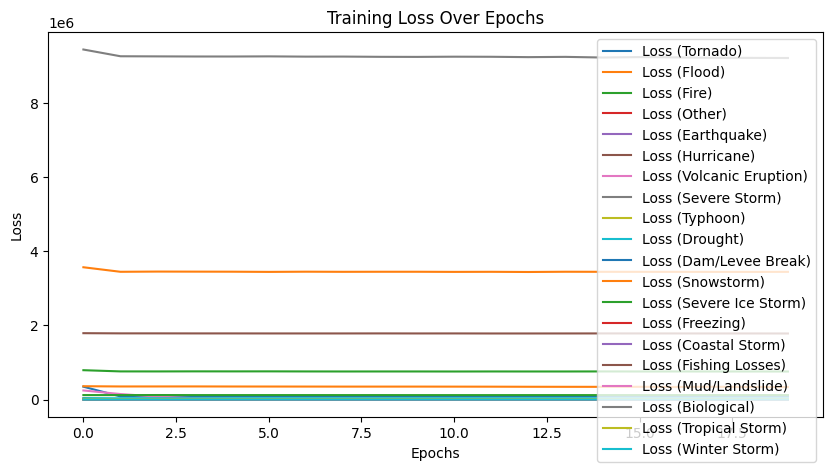

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


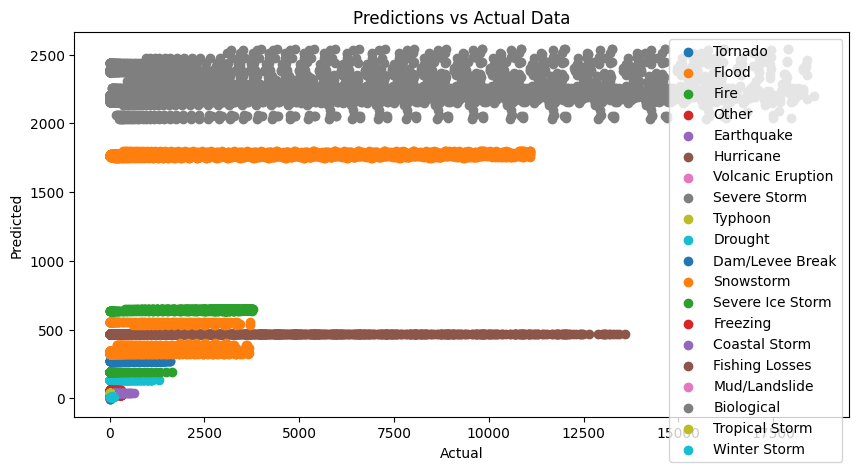

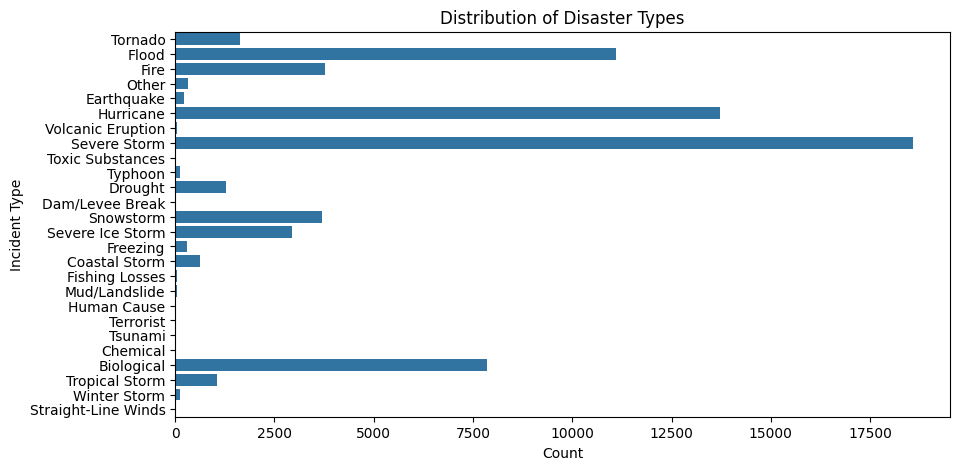

In [69]:
import requests
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime, timedelta

# Step 1: Fetch Data with Pagination
def fetch_all_disaster_data():
    base_url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries"
    all_data = []
    batch_size = 1000
    skip = 0

    while True:
        url = f"{base_url}?$top={batch_size}&$skip={skip}"
        response = requests.get(url)
        data = response.json()

        if "DisasterDeclarationsSummaries" not in data:
            break

        batch = data["DisasterDeclarationsSummaries"]
        all_data.extend(batch)

        if len(batch) < batch_size:
            break

        skip += batch_size

    return pd.DataFrame(all_data)

# Fetch all disaster records
df = fetch_all_disaster_data()

# Step 2: Extract Relevant Fields
columns = ["incidentType", "incidentBeginDate", "region"]
df = df[columns]
df.fillna("", inplace=True)

df["incidentBeginDate"] = pd.to_datetime(df["incidentBeginDate"], errors="coerce")
df.dropna(subset=["incidentBeginDate"], inplace=True)
df.sort_values(by="incidentBeginDate", ascending=True, inplace=True)

# Apply Exponential Decay for Duplicate Incidents
lambda_decay = 0.1  # Decay rate
df["region_incident_date"] = df["region"].astype(str) + "_" + df["incidentBeginDate"].dt.to_period("W").astype(str)
df["weight"] = 1.0

duplicate_counts = df.groupby(["region_incident_date", "incidentType"]).cumcount()
df["weight"] *= np.exp(-lambda_decay * duplicate_counts)

df.drop(columns=["region_incident_date"], inplace=True)

# Step 3: Encode Categorical Features
label_encoder_region = LabelEncoder()
df["region_encoded"] = label_encoder_region.fit_transform(df["region"].astype(str))

# Step 4: Train Separate LSTMs per Incident Type
unique_incident_types = df["incidentType"].unique()
models = {}
incident_datasets = {}
history_dict = {}

for incident in unique_incident_types:
    incident_df = df[df["incidentType"] == incident]
    if len(incident_df) < 10:
        continue  # Skip training if there's not enough data
    
    incident_df["year"] = incident_df["incidentBeginDate"].dt.year
    incident_df["month"] = incident_df["incidentBeginDate"].dt.month
    
    X = incident_df[["year", "month", "region_encoded"]]
    y = np.arange(len(incident_df)) * incident_df["weight"].values  # Apply weighting

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    history = model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)
    
    models[incident] = model
    incident_datasets[incident] = (X_test, y_test)
    history_dict[incident] = history

# Step 5: Generate Predictions & Merge Results
predictions = []

max_prediction_date = df["incidentBeginDate"].max() + timedelta(days=3650)  # Limit predictions to 10 years

for incident, model in models.items():
    X_test, _ = incident_datasets[incident]
    y_pred = model.predict(X_test)
    
    base_future_date = df["incidentBeginDate"].max()
    
    for i in range(len(y_pred)):
        days_until_next = min(3650, max(1, int(abs(y_pred[i].item()))))  # Clamp days within a reasonable range
        prediction_date = base_future_date + timedelta(days=days_until_next)
        
        if prediction_date > max_prediction_date:
            break  # Stop predictions if exceeding the limit
        
        predictions.append({
            "incidentType": incident,
            "predictedDate": prediction_date.strftime("%Y-%m-%dT%H:%M:%S.000Z")
        })
        
        base_future_date = prediction_date  # Update for the next prediction

# Sort predictions by date
predictions = sorted(predictions, key=lambda x: x["predictedDate"])

df_predictions = pd.DataFrame(predictions)

# Save predictions to CSV
df_predictions.to_csv("predictions.csv", index=False)

print(df_predictions.head(100))

# Visualization: Loss Over Epochs
plt.figure(figsize=(10, 5))
for incident, history in history_dict.items():
    plt.plot(history.history['loss'], label=f"Loss ({incident})")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss Over Epochs")
plt.show()

# Visualization: Predictions vs. Actual
plt.figure(figsize=(10, 5))
for incident, (X_test, y_test) in incident_datasets.items():
    y_pred = models[incident].predict(X_test)
    plt.scatter(y_test, y_pred, label=incident)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.title("Predictions vs Actual Data")
plt.show()

# Visualization: Incident Type Distribution
plt.figure(figsize=(10, 5))
sns.countplot(y=df["incidentType"])
plt.xlabel("Count")
plt.ylabel("Incident Type")
plt.title("Distribution of Disaster Types")
plt.show()


Epoch 1/50


C:\Users\phana\AppData\Local\Temp\ipykernel_13200\464217446.py:53: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["region_incident_date"] = df["region"].astype(str) + "_" + df["incidentBeginDate"].dt.to_period("W").astype(str)
c:\Users\phana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - loss: 127916.0312 - mae: 275.5260
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 86705.3750 - mae: 237.8006
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 89851.2031 - mae: 243.1486
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - loss: 85371.1094 - mae: 237.8210
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 82971.7266 - mae: 233.1161
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 85965.0234 - mae: 238.2123
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 82469.3359 - mae: 230.9979
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 81573.1172 - mae: 228.3990
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 85038.8438 - mae: 241.1451
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 83085.6094 - mae: 238.7431
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - loss: 90608.4844 - mae: 247.9749
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/ste

c:\Users\phana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - loss: 3756882.5000 - mae: 1466.1100
Epoch 2/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 3550374.7500 - mae: 1497.5715
Epoch 3/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 3449561.5000 - mae: 1475.2513
Epoch 4/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 3562467.5000 - mae: 1483.7148
Epoch 5/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 3459741.0000 - mae: 1458.1835
Epoch 6/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 3624554.7500 - mae: 1499.4054
Epoch 7/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 3504237.2500 - mae: 1480.6411
Epoch 8/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 3454414.5000 - mae: 1467.2408
Epoch 9/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 3459983.7500 - mae: 1471.7880
Epoch 10/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 3404773.7500 - mae: 1452.8619
Epoch 11/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 3504806.5000 - mae: 1478.50

c:\Users\phana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - loss: 816191.9375 - mae: 687.2260
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 737604.6250 - mae: 717.5811
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 782133.6250 - mae: 745.1135
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 761965.7500 - mae: 723.3136
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 767114.8750 - mae: 734.3594
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 771330.6250 - mae: 731.8662 
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 751973.5625 - mae: 726.7822
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 744289.3750 - mae: 711.0810
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 777021.3750 - mae: 732.0178
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 743942.6875 - mae: 712.5514
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 756451.9375 - mae: 723.5480
Epoch 12/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 0

c:\Users\phana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9747.9189 - mae: 79.0799 
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5962.9473 - mae: 61.7654  
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3595.0271 - mae: 48.2235
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2679.0547 - mae: 39.8100 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 2270.0410 - mae: 35.5155
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2404.7783 - mae: 35.7922  
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2258.1111 - mae: 36.0195  
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1979.8468 - mae: 32.8949  
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2087.2949 - mae: 34.0225  
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1861.4109 - mae: 31.8261
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1997.8467 - mae: 31.8907  
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1892.0939 - mae: 30.6587
Epoch 13/50
8/8 ━━━

c:\Users\phana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 41872.4453 - mae: 181.3001  
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5751.0273 - mae: 61.28161
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6742.3643 - mae: 65.6535  
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 4251.1675 - mae: 53.8791
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3493.9287 - mae: 45.6426  
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2331.2434 - mae: 39.8944
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2415.0037 - mae: 40.0294  
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2239.0557 - mae: 38.2785
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2111.0439 - mae: 35.7332  
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1771.0121 - mae: 34.2875 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 1962.8663 - mae: 36.5316
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1607.4849 - mae: 30.9742  
Epoch 13/50
6/6

c:\Users\phana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 533us/step - loss: 1808602.3750 - mae: 698.7287
Epoch 2/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 1826312.5000 - mae: 722.9250
Epoch 3/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 1719339.0000 - mae: 717.2070
Epoch 4/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 1908744.1250 - mae: 742.2240
Epoch 5/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 1799230.0000 - mae: 716.8314
Epoch 6/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 1824218.1250 - mae: 710.7273
Epoch 7/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 1911808.5000 - mae: 736.9503
Epoch 8/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 1734906.0000 - mae: 703.7743
Epoch 9/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 1898673.7500 - mae: 726.6741
Epoch 10/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 1800712.2500 - mae: 719.9738
Epoch 11/50
343/343 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 1772409.8750 - mae: 700.2337
Epoch 12

c:\Users\phana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13356.0088 - mae: 87.6505
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19180.6836 - mae: 110.5533
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17121.8652 - mae: 108.2972
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13575.7412 - mae: 96.5757   
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10312.9785 - mae: 82.8196
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8399.9414 - mae: 72.2293
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9331.4639 - mae: 82.2768
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9523.9092 - mae: 79.9680
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6211.3628 - mae: 62.4135
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5235.9297 - mae: 60.1399
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4150.3247 - mae: 49.7758
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6633.1870 - mae: 63.6488
Epoch 13/50
2/2 ━━━━━━━━━━

c:\Users\phana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step - loss: 9818535.0000 - mae: 2228.6868
Epoch 2/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 9219448.0000 - mae: 2276.3120
Epoch 3/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 9186209.0000 - mae: 2266.4622
Epoch 4/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 9269077.0000 - mae: 2253.6968
Epoch 5/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 9130205.0000 - mae: 2258.8325
Epoch 6/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 9113718.0000 - mae: 2249.5620
Epoch 7/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 9276293.0000 - mae: 2285.8772
Epoch 8/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 9310890.0000 - mae: 2290.6479
Epoch 9/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 9352796.0000 - mae: 2289.5103
Epoch 10/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 9193850.0000 - mae: 2260.6062
Epoch 11/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 9284840.0000 - mae: 2278.50

c:\Users\phana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9962.4980 - mae: 80.4272  
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5632.7524 - mae: 63.5627
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4945.2861 - mae: 53.9740
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3641.5679 - mae: 46.5687  
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3408.9001 - mae: 44.7977  
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2356.2991 - mae: 38.8053
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2627.6331 - mae: 41.4464   
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2005.0419 - mae: 35.9986  
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1653.6140 - mae: 33.234788
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1566.8361 - mae: 31.3618
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1539.4103 - mae: 31.5620  
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1791.2769 - mae: 32.8753  
Epoch 13/50
4/4 ━━━

c:\Users\phana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - loss: 39961.2422 - mae: 146.9511
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 35298.8633 - mae: 134.5921
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 33122.2656 - mae: 125.7467
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 34657.9375 - mae: 132.7052
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 30711.3242 - mae: 129.1352
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 34932.5977 - mae: 122.5516
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 33788.3320 - mae: 130.3183
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 31260.5820 - mae: 128.6757
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 34348.9375 - mae: 130.6369
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 27458.2344 - mae: 118.7435
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 33721.8711 - mae: 129.6653
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step

c:\Users\phana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step - loss: 31040.0254 - mae: 140.6013
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 10939.4658 - mae: 86.5686
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 10202.9746 - mae: 90.3685
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 16591.0039 - mae: 112.2108
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8092.7148 - mae: 75.7149
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9252.6182 - mae: 77.7964
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 13858.7686 - mae: 87.3222
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8518.2246 - mae: 73.9004
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8613.6699 - mae: 70.3346
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 18014.5508 - mae: 115.7685
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2212.6348 - mae: 40.8849
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8584.0918 - mae: 76.3669
Epoch 13/50
1/

c:\Users\phana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - loss: 371331.0625 - mae: 398.3159
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 345491.9062 - mae: 410.8675
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 339414.1875 - mae: 403.7845
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 313130.4375 - mae: 387.7171
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 345405.3438 - mae: 408.5049
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 324742.8438 - mae: 387.4206
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 330047.6250 - mae: 384.0446
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 344921.8438 - mae: 389.6151
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 343204.9062 - mae: 389.6585
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 303128.0625 - mae: 374.9508
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 343858.4062 - mae: 393.5570
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s

c:\Users\phana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - loss: 120539.6172 - mae: 222.1846 
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 125694.9141 - mae: 230.9990
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 105009.8516 - mae: 206.2359 
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 121401.1328 - mae: 226.7560
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 109383.4531 - mae: 212.9695
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 117296.2656 - mae: 225.4524
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 109888.1094 - mae: 211.2092
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 126255.0859 - mae: 226.5191
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 120470.9766 - mae: 220.0278
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 142938.0469 - mae: 245.6925
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 121836.2500 - mae: 223.6863
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\phana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 30697.1562 - mae: 141.5297 
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12122.0273 - mae: 87.4069  
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8265.4766 - mae: 72.05339
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6376.7417 - mae: 61.4809  
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5785.8208 - mae: 63.7311 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4611.3740 - mae: 53.9630  
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 4203.9731 - mae: 48.4881
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3565.4575 - mae: 47.83209
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3603.9419 - mae: 42.71883
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4042.1973 - mae: 51.3254
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3689.9080 - mae: 48.3938  
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3315.8867 - mae: 44.9838  
Epoch 13/50
8/8 

c:\Users\phana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - loss: 21965.5664 - mae: 112.5035
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 10187.4785 - mae: 64.0622 
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 9227.6152 - mae: 62.2287 
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 7900.4126 - mae: 58.0263 
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 9153.8916 - mae: 59.1630
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 8555.0322 - mae: 59.5420
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 7564.4482 - mae: 54.4286
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 8926.3096 - mae: 59.2872
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 9539.3828 - mae: 59.7599
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 7802.5620 - mae: 57.0562
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 9381.4443 - mae: 61.8643 
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 8795.2

c:\Users\phana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 38264.6094 - mae: 176.0506  
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11887.5723 - mae: 88.0223
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5047.9976 - mae: 59.9342  
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7335.2979 - mae: 66.9550  
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9588.1533 - mae: 83.0523 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16843.4941 - mae: 110.6990
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9269.8945 - mae: 82.0519 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2675.9905 - mae: 41.5828
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4512.2339 - mae: 50.2218
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3396.0876 - mae: 44.1912  
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5511.0962 - mae: 56.8151
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3752.3140 - mae: 49.0790
Epoch 13/50
2/2 ━━━━━

c:\Users\phana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 30376.0195 - mae: 157.2966 
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9180.4834 - mae: 77.4351
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2764.0276 - mae: 41.8432
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3696.4751 - mae: 45.1975
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5200.3931 - mae: 60.9521
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3861.5696 - mae: 53.8204  
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4022.2158 - mae: 50.6888   
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2620.2808 - mae: 39.9518
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2020.4376 - mae: 33.2156  
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2826.5920 - mae: 45.2462
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1540.2671 - mae: 31.0394
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1678.4872 - mae: 34.4161
Epoch 13/50
2/2 ━━━━━━━━━━

c:\Users\phana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - loss: 9839.0840 - mae: 43.8976
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 10680.6357 - mae: 28.1193
Epoch 3/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 5701.4678 - mae: 20.1213
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - loss: 8290.2686 - mae: 22.9234
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 6642.9053 - mae: 19.3504
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 6890.4341 - mae: 20.5255
Epoch 7/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 6943.4492 - mae: 18.9573
Epoch 8/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - loss: 6787.8286 - mae: 20.6343
Epoch 9/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 7714.4487 - mae: 23.1355
Epoch 10/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 9077.4014 - mae: 23.9080
Epoch 11/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 6941.4521 - mae: 19.3508
Epoch 12/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/s

c:\Users\phana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - loss: 18401.2773 - mae: 93.7401 
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 12482.3955 - mae: 70.5032
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 13352.9404 - mae: 72.3125
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 12907.4092 - mae: 72.6561
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 11123.6699 - mae: 65.1026
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 13858.5879 - mae: 71.1343 
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 12770.3838 - mae: 70.4980
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 14035.1328 - mae: 70.3829
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 11861.3701 - mae: 66.2960
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 13646.9355 - mae: 70.6243
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 10360.9961 - mae: 62.3340
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 

c:\Users\phana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18930.9219 - mae: 116.9832  
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11265.8555 - mae: 82.4389 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8973.3945 - mae: 79.9029  
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6860.9531 - mae: 65.0337
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4108.5308 - mae: 49.8533
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4669.9043 - mae: 56.0103  
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5436.0625 - mae: 57.6168
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3464.9651 - mae: 47.5607
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3508.3237 - mae: 44.9978  
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2348.5049 - mae: 39.57618
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2235.3789 - mae: 37.4650
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2607.0032 - mae: 40.4217
Epoch 13/50
3/3 ━━━━━━━

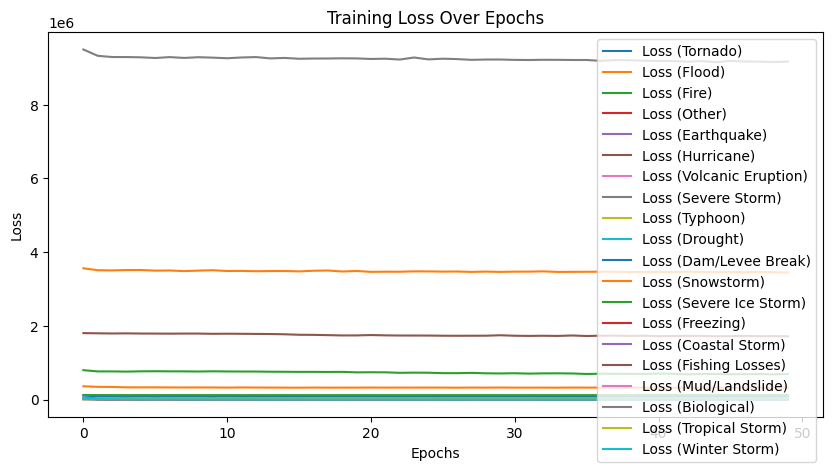

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


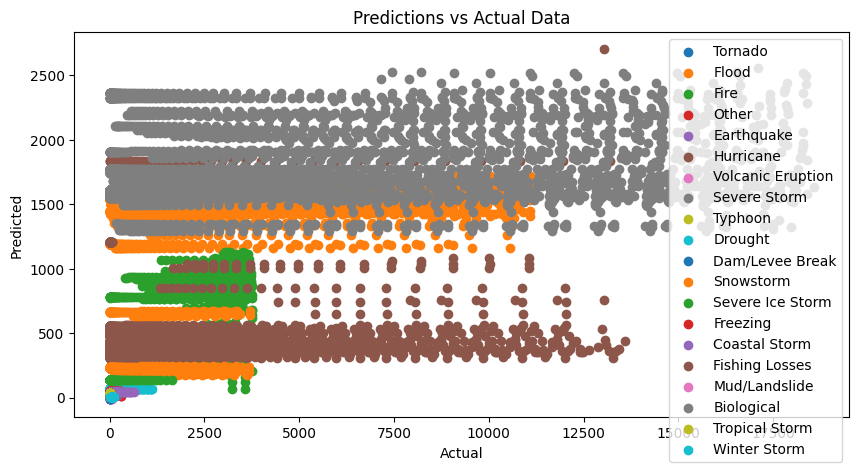

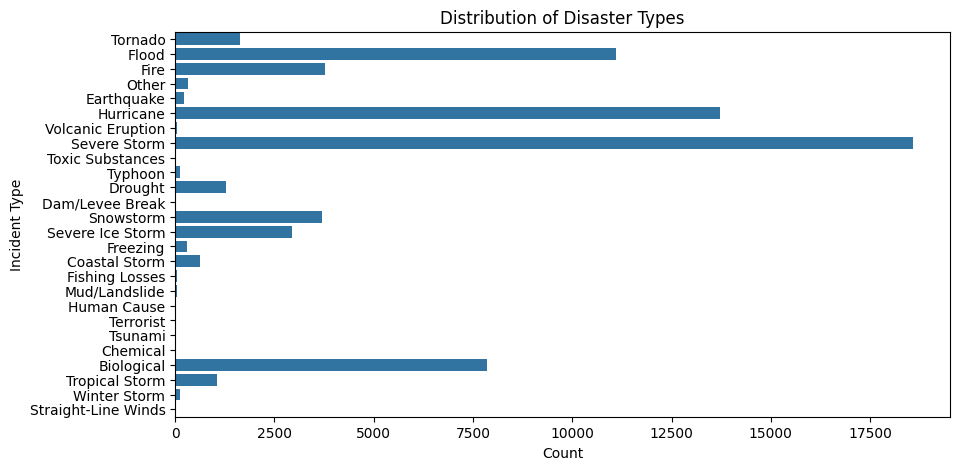

In [7]:
import requests
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime, timedelta

# Step 1: Fetch Data with Pagination
def fetch_all_disaster_data():
    base_url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries"
    all_data = []
    batch_size = 1000
    skip = 0

    while True:
        url = f"{base_url}?$top={batch_size}&$skip={skip}"
        response = requests.get(url)
        data = response.json()

        if "DisasterDeclarationsSummaries" not in data:
            break

        batch = data["DisasterDeclarationsSummaries"]
        all_data.extend(batch)

        if len(batch) < batch_size:
            break

        skip += batch_size

    return pd.DataFrame(all_data)

# Fetch all disaster records
df = fetch_all_disaster_data()

# Step 2: Extract Relevant Fields
columns = ["incidentType", "incidentBeginDate", "region"]
df = df[columns]
df.fillna("", inplace=True)

df["incidentBeginDate"] = pd.to_datetime(df["incidentBeginDate"], errors="coerce")
df.dropna(subset=["incidentBeginDate"], inplace=True)
df.sort_values(by="incidentBeginDate", ascending=True, inplace=True)

# Apply Exponential Decay for Duplicate Incidents
lambda_decay = 0.1  # Decay rate
df["region_incident_date"] = df["region"].astype(str) + "_" + df["incidentBeginDate"].dt.to_period("W").astype(str)
df["weight"] = 1.0

duplicate_counts = df.groupby(["region_incident_date", "incidentType"]).cumcount()
df["weight"] *= np.exp(-lambda_decay * duplicate_counts)

df.drop(columns=["region_incident_date"], inplace=True)

# Step 3: Feature Engineering
label_encoder_region = LabelEncoder()
df["region_encoded"] = label_encoder_region.fit_transform(df["region"].astype(str)).astype(np.int32)

df["year"] = df["incidentBeginDate"].dt.year
df["month"] = df["incidentBeginDate"].dt.month
df["day_of_year"] = df["incidentBeginDate"].dt.dayofyear
df["quarter"] = df["incidentBeginDate"].dt.quarter
df["week_of_year"] = df["incidentBeginDate"].dt.isocalendar().week

# Step 4: Train Separate LSTMs per Incident Type
unique_incident_types = df["incidentType"].unique()
models = {}
incident_datasets = {}
history_dict = {}

for incident in unique_incident_types:
    incident_df = df[df["incidentType"] == incident]
    if len(incident_df) < 10:
        continue  # Skip training if there's not enough data
    
    X = incident_df[["year", "month", "day_of_year", "quarter", "week_of_year", "region_encoded"]].astype(np.float32)
    y = (np.arange(len(incident_df)) * incident_df["weight"].values).astype(np.float32)  # Apply weighting
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])

    optimizer = Adam(learning_rate=0.001, decay=1e-5)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)
    
    models[incident] = model
    incident_datasets[incident] = (X_test, y_test)
    history_dict[incident] = history

# Step 5: Generate Predictions & Merge Results
predictions = []

max_prediction_date = df["incidentBeginDate"].max() + timedelta(days=3650)  # Limit predictions to 10 years

for incident, model in models.items():
    X_test, _ = incident_datasets[incident]
    y_pred = model.predict(X_test)
    
    base_future_date = df["incidentBeginDate"].max()
    
    for i in range(len(y_pred)):
        days_until_next = min(3650, max(1, int(abs(y_pred[i].item()))))  # Clamp days within a reasonable range
        prediction_date = base_future_date + timedelta(days=days_until_next)
        
        if prediction_date > max_prediction_date:
            break  # Stop predictions if exceeding the limit
        
        predictions.append({
            "incidentType": incident,
            "predictedDate": prediction_date.strftime("%Y-%m-%dT%H:%M:%S.000Z")
        })
        
        base_future_date = prediction_date  # Update for the next prediction

# Sort predictions by date
predictions = sorted(predictions, key=lambda x: x["predictedDate"])

df_predictions = pd.DataFrame(predictions)

# Save predictions to CSV
df_predictions.to_csv("predictions.csv", index=False)

print(df_predictions.head(100))

# Visualization: Loss Over Epochs
plt.figure(figsize=(10, 5))
for incident, history in history_dict.items():
    plt.plot(history.history['loss'], label=f"Loss ({incident})")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss Over Epochs")
plt.show()

# Visualization: Predictions vs. Actual
plt.figure(figsize=(10, 5))
for incident, (X_test, y_test) in incident_datasets.items():
    y_pred = models[incident].predict(X_test)
    plt.scatter(y_test, y_pred, label=incident)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.title("Predictions vs Actual Data")
plt.show()

# Visualization: Incident Type Distribution
plt.figure(figsize=(10, 5))
sns.countplot(y=df["incidentType"])
plt.xlabel("Count")
plt.ylabel("Incident Type")
plt.title("Distribution of Disaster Types")
plt.show()
